In [127]:
import pandas as pd

from IPython.display import display, HTML



In [128]:
import pandas as pd
mean_compound_per_day = pd.read_csv('Data/mean_compound_per_day.csv')
mean_compound_before_930am = pd.read_csv('Data/mean_compound_before_930am.csv') 
mean_compound_trading_hours = pd.read_csv('Data/mean_compound_trading_hours.csv')
mean_compound_after_4pm_before_930am = pd.read_csv('Data/mean_compound_after_4pm_before_930am.csv')

mean_compound_per_day_without_other = pd.read_csv('Data/mean_compound_per_day_without_other.csv')
mean_compound_before_930am_without_other = pd.read_csv('Data/mean_compound_before_930am_without_other.csv') 
mean_compound_trading_hours_without_other = pd.read_csv('Data/mean_compound_trading_hours_without_other.csv')
mean_compound_after_4pm_before_930am_without_other = pd.read_csv('Data/mean_compound_after_4pm_before_930am_without_other.csv')


In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb
# import all the libraries required for this chapter
# Machine Learning Libraries: scikit-learn, keras and tensorflow

# setting seed for model reproducibility
seed_value = 42
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)
import pandas as pd

In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import normalize, Normalizer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.compose import ColumnTransformer
import sklearn.cluster as cluster
import lightgbm as lgb
import xgboost as xgb

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
# from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
# from keras.utils import np_utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# plotting libraries
import matplotlib as mpl
import matplotlib.style
import seaborn as sns  # visualization
import matplotlib.pyplot as plt
# formatting for decimal places
pd.set_option("display.float_format", "{:.2f}".format)

sns.set_style("white")
import warnings
warnings.filterwarnings('ignore')

In [131]:

# Regression Metrics
def reg_metrics(test, pred):
    '''Function returns basic metrics for regression models'''
    print('Mean Absolute Error:', metrics.mean_absolute_error(test, pred))
    print('Mean Squared Error:', metrics.mean_squared_error(test, pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test, pred)))
    print('R Squared:', metrics.r2_score(test, pred))

# Regression Plot
def reg_plot(test, pred):
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.show()

# Scatter Plot Comparison
def scatter_plot_comparison(test, pred):
    '''Function returns a comparison between test data and predictions, in the form of a scatter plot'''
    sns.scatterplot(x=test.index, y=test.values, color='red', label='Test data')
    sns.scatterplot(x=test.index, y=pred, color='blue', label='Predicted data')
    plt.title('Prediction')
    plt.xlabel('Observations')
    plt.ylabel('Test and Predicted Values')
    plt.legend()
    plt.show()

# Line Plot Comparison
def line_plot_comparison(test, pred):
    '''Function returns a comparison between test data and predictions, in the form of line plot'''
    plt.plot(test.values, color='red', label='Test data')
    plt.plot(pred, color='blue', label='Predicted data')
    plt.title('Prediction')
    plt.xlabel('Observations')
    plt.ylabel('Test and Predicted Values')
    plt.legend()
    plt.show()

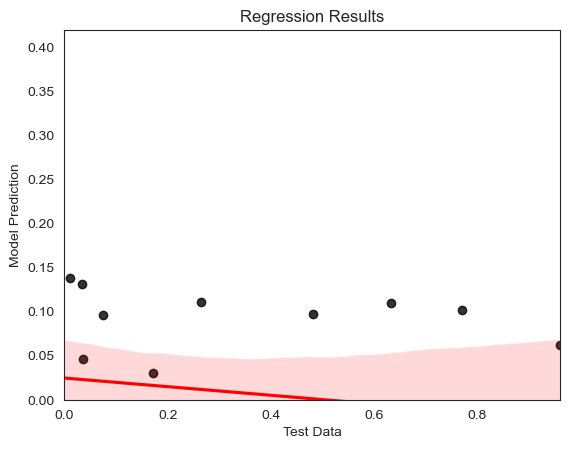

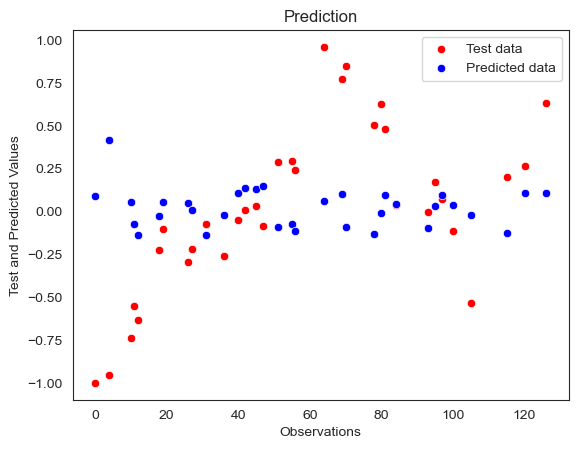

Mean Absolute Error: 0.402082947602751
Mean Squared Error: 0.26642726361814173
Root Mean Squared Error: 0.5161659264404632
R Squared: -0.15354755624775285


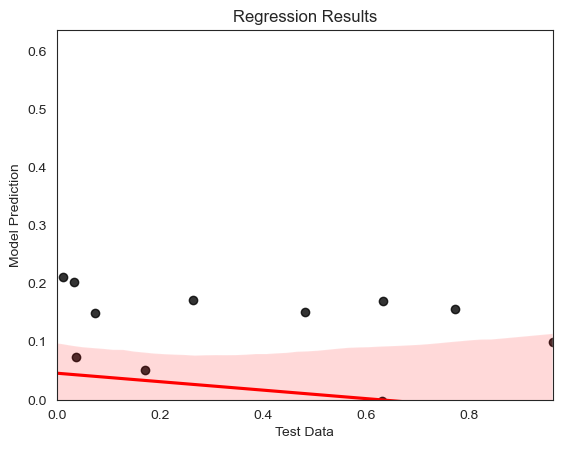

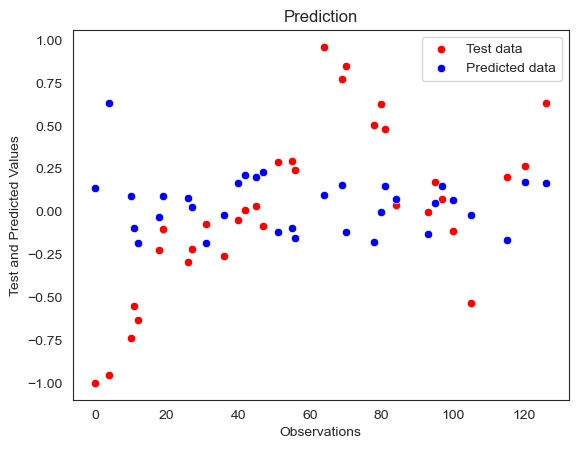

Mean Absolute Error: 0.4230533586400338
Mean Squared Error: 0.2929537947106836
Root Mean Squared Error: 0.5412520620844632
R Squared: -0.2683992223347067


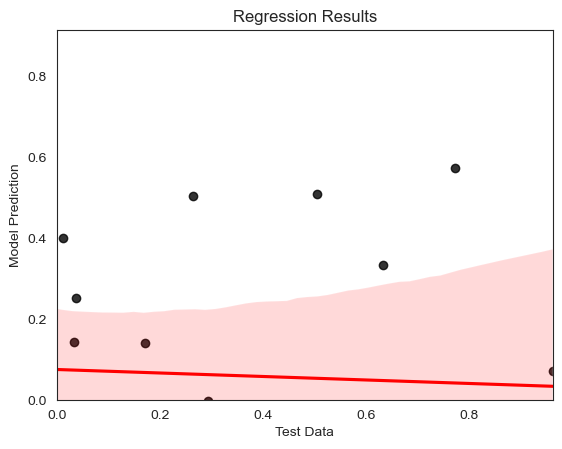

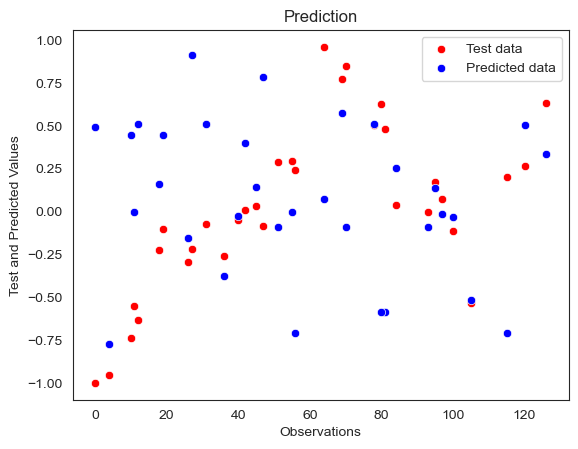

Mean Absolute Error: 0.5076533850860325
Mean Squared Error: 0.44862489516688664
Root Mean Squared Error: 0.669794666421648
R Squared: -0.9424068860812624


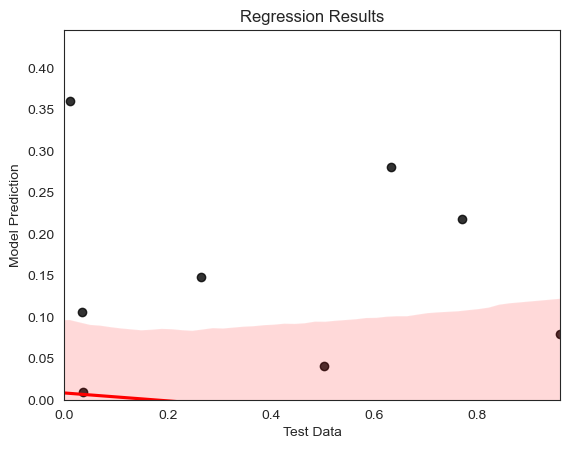

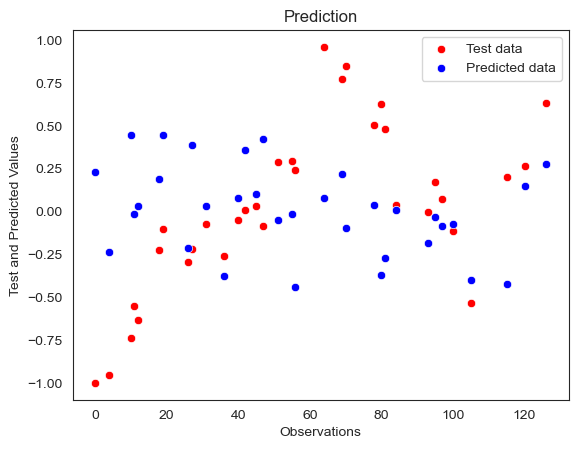

Mean Absolute Error: 0.4555021435207033
Mean Squared Error: 0.3185658760210595
Root Mean Squared Error: 0.5644164030403966
R Squared: -0.37929160401058515


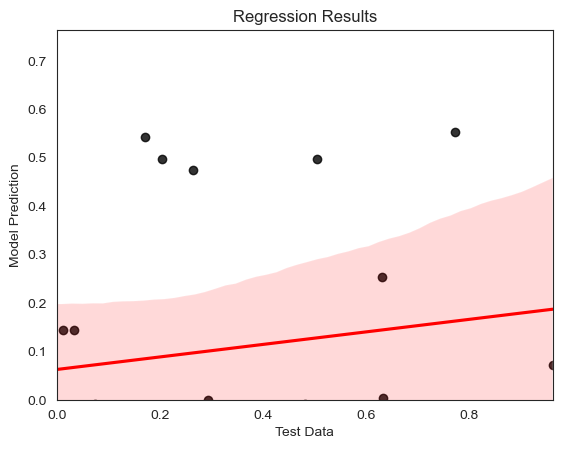

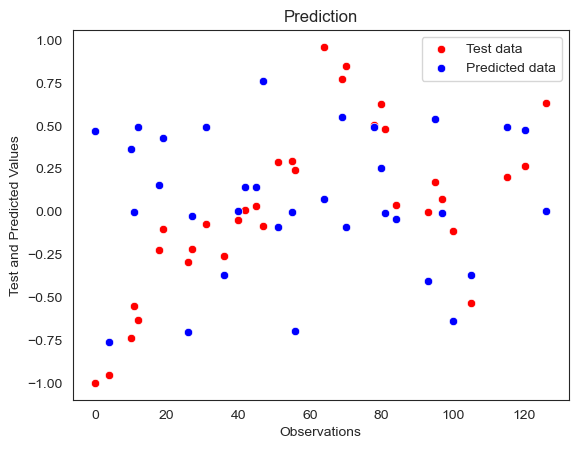

Mean Absolute Error: 0.45690070338292604
Mean Squared Error: 0.33573058604088724
Root Mean Squared Error: 0.579422631626421
R Squared: -0.4536094836006126


,Model,R Squared
1,🥇 Linear Regression,-0.15
2,🥈 Support Vector Regression,-0.27
3,🥉 Random Forest Regression,-0.38
4,XGBoost Regression,-0.45
5,Decision Tree Regression,-0.94


In [132]:
from IPython.display import display, HTML

data_cont = mean_compound_per_day
# Move response variable (Normalized Adj Close) to the end of the DataFrame
data_cont = data_cont[[col for col in data_cont.columns if col != 'Normalized Adj Close'] + ['Normalized Adj Close']]



# Splitting the dataset - Make sure that the response variable is in the last column
X = data_cont[['mean_compound_per_day']]
y = data_cont['Normalized Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a dictionary to store R squared values for each regression model
r2_values = {}

# 1. Linear Regression
display(HTML("<h1>Linear Regression</h1>"))
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
reg_plot(y_test, y_pred_lin)
scatter_plot_comparison(y_test, y_pred_lin)
reg_metrics(y_test, y_pred_lin)
r2_values['Linear Regression'] = metrics.r2_score(y_test, y_pred_lin)

# 2. Support Vector Regression (SVR)
display(HTML("<h1>Support Vector Regression (SVR)</h1>"))
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)
reg_plot(y_test, y_pred_svr)
scatter_plot_comparison(y_test, y_pred_svr)
reg_metrics(y_test, y_pred_svr)
r2_values['Support Vector Regression'] = metrics.r2_score(y_test, y_pred_svr)

# 3. Decision Tree - Regression
display(HTML("<h1>Decision Tree - Regression</h1>"))
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
reg_plot(y_test, y_pred_dt)
scatter_plot_comparison(y_test, y_pred_dt)
reg_metrics(y_test, y_pred_dt)
r2_values['Decision Tree Regression'] = metrics.r2_score(y_test, y_pred_dt)

# 4. Random Forest - Regression
display(HTML("<h1>Random Forest - Regression</h1>"))
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
reg_plot(y_test, y_pred_rf)
scatter_plot_comparison(y_test, y_pred_rf)
reg_metrics(y_test, y_pred_rf)
r2_values['Random Forest Regression'] = metrics.r2_score(y_test, y_pred_rf)

# 5. XGBoost - Regression
display(HTML("<h1>XGBoost - Regression</h1>"))
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
reg_plot(y_test, y_pred_xgb)
scatter_plot_comparison(y_test, y_pred_xgb)
reg_metrics(y_test, y_pred_xgb)
r2_values['XGBoost Regression'] = metrics.r2_score(y_test, y_pred_xgb)

# Create a DataFrame to display R squared values and sort them by the highest value
r2_df = pd.DataFrame(list(r2_values.items()), columns=['Regression Type', 'R Squared'])
r2_df_sorted = r2_df.sort_values(by='R Squared', ascending=False)



# Create a list of model names and R Squared values, adding ranking symbols
sorted_r2 = r2_df_sorted.reset_index(drop=True)
sorted_r2['Ranking'] = ['🥇', '🥈', '🥉'] + [''] * (len(sorted_r2) - 3)

# Create a formatted DataFrame
formatted_df = pd.DataFrame({
    'Model': sorted_r2['Ranking'] + ' ' + sorted_r2['Regression Type'],
    'R Squared': sorted_r2['R Squared'].round(4)
})

# Set the index to start from 1 for rankings
formatted_df.index += 1




# Display the DataFrame
formatted_df




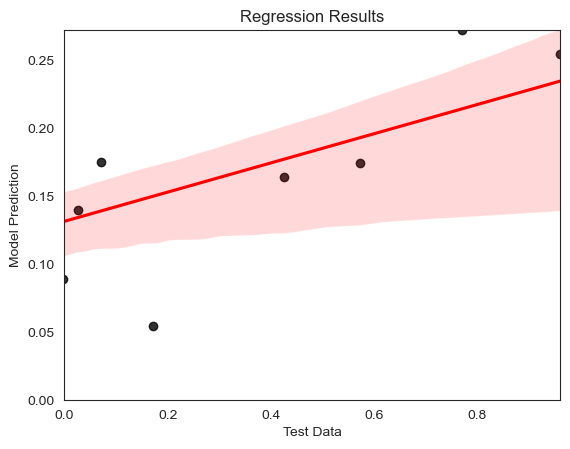

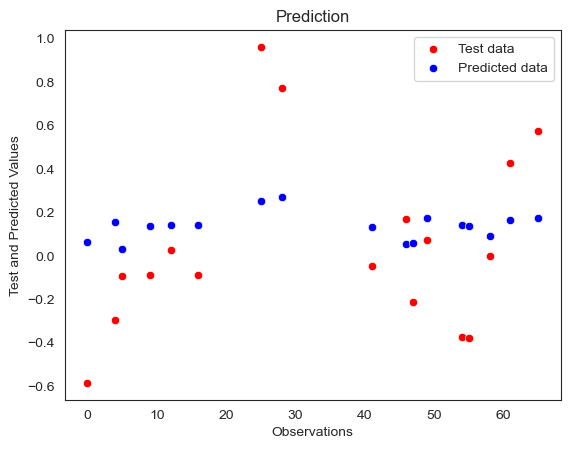

Mean Absolute Error: 0.32079643087144744
Mean Squared Error: 0.14121559791300065
Root Mean Squared Error: 0.3757866388164974
R Squared: 0.14443729180386777


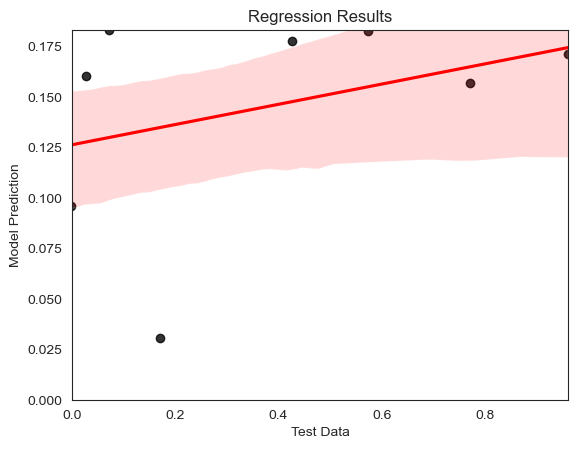

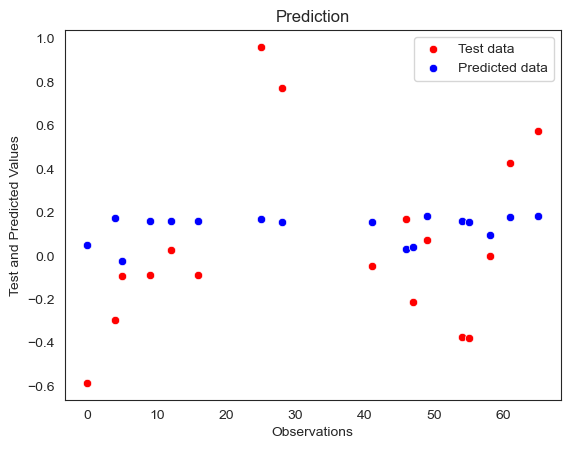

Mean Absolute Error: 0.33640972249532947
Mean Squared Error: 0.15876558355665416
Root Mean Squared Error: 0.3984539917690048
R Squared: 0.038109708534080244


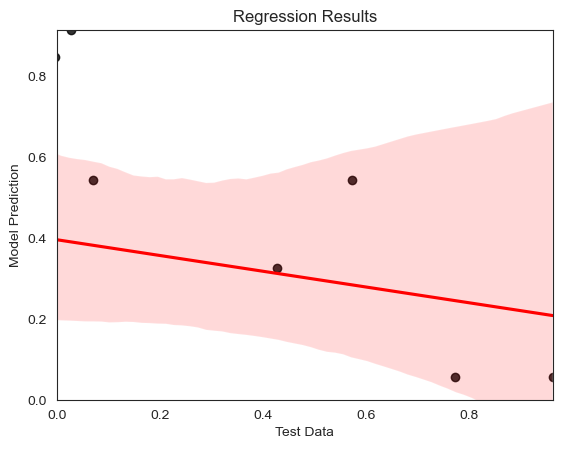

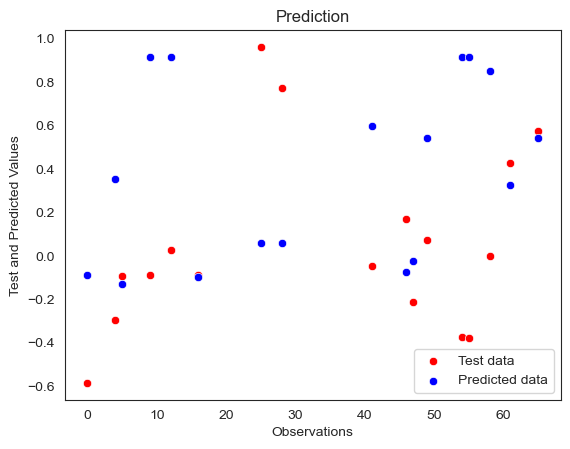

Mean Absolute Error: 0.5774879001748371
Mean Squared Error: 0.5055105271527072
Root Mean Squared Error: 0.7109926350903413
R Squared: -2.062664195911802


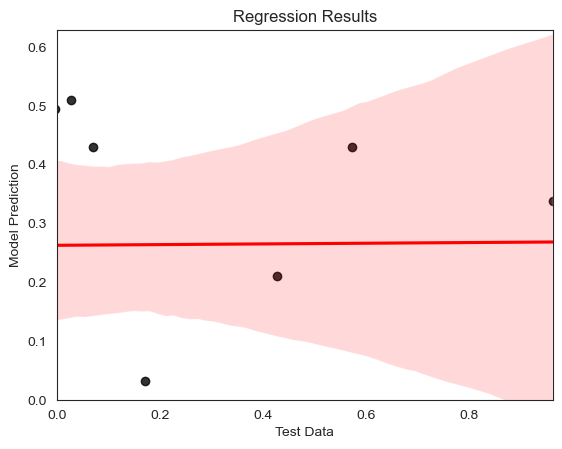

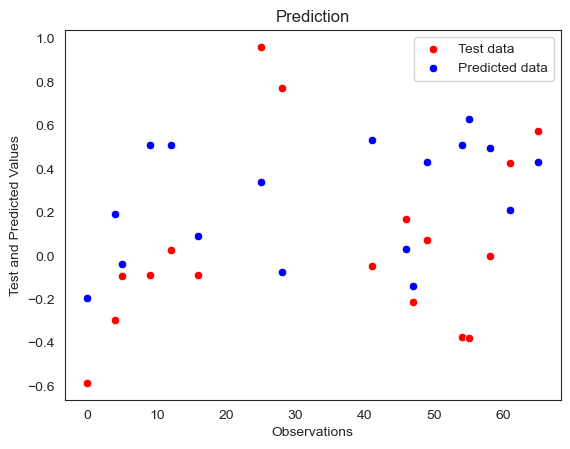

Mean Absolute Error: 0.44488836927612707
Mean Squared Error: 0.2774947696855772
Root Mean Squared Error: 0.5267777232244898
R Squared: -0.6812177986791461


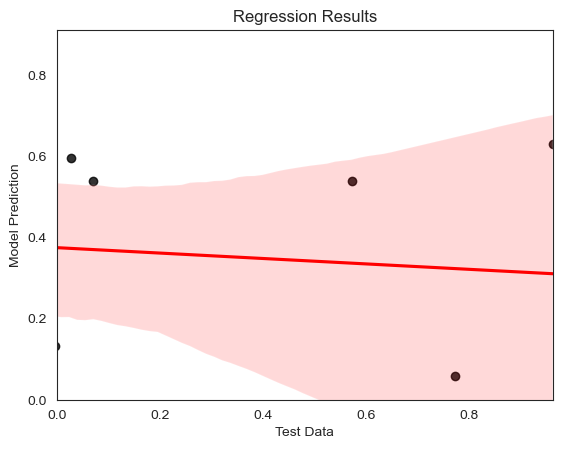

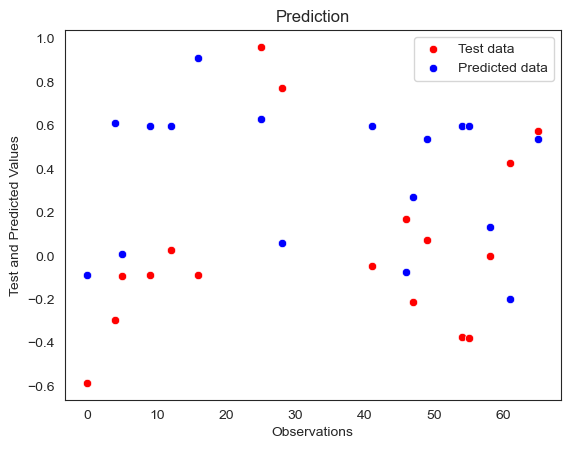

Mean Absolute Error: 0.551363263790583
Mean Squared Error: 0.39421079922391117
Root Mean Squared Error: 0.6278620861494275
R Squared: -1.388348482523552


,Model,R Squared
1,🥇 Linear Regression,0.14
2,🥈 Support Vector Regression,0.04
3,🥉 Random Forest Regression,-0.68
4,XGBoost Regression,-1.39
5,Decision Tree Regression,-2.06


In [133]:
from IPython.display import display, HTML

data_cont = mean_compound_before_930am
# Move response variable (Normalized Adj Close) to the end of the DataFrame
data_cont = data_cont[[col for col in data_cont.columns if col != 'Normalized Adj Close'] + ['Normalized Adj Close']]



# Splitting the dataset - Make sure that the response variable is in the last column
X = data_cont[['mean_compound_before_930am']]
y = data_cont['Normalized Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a dictionary to store R squared values for each regression model
r2_values = {}

display(HTML("<h1>mean_compound_before_930am</h1>"))
# 1. Linear Regression
display(HTML("<h1>Linear Regression</h1>"))
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
reg_plot(y_test, y_pred_lin)
scatter_plot_comparison(y_test, y_pred_lin)
reg_metrics(y_test, y_pred_lin)
r2_values['Linear Regression'] = metrics.r2_score(y_test, y_pred_lin)

# 2. Support Vector Regression (SVR)
display(HTML("<h1>Support Vector Regression (SVR)</h1>"))
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)
reg_plot(y_test, y_pred_svr)
scatter_plot_comparison(y_test, y_pred_svr)
reg_metrics(y_test, y_pred_svr)
r2_values['Support Vector Regression'] = metrics.r2_score(y_test, y_pred_svr)

# 3. Decision Tree - Regression
display(HTML("<h1>Decision Tree - Regression</h1>"))
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
reg_plot(y_test, y_pred_dt)
scatter_plot_comparison(y_test, y_pred_dt)
reg_metrics(y_test, y_pred_dt)
r2_values['Decision Tree Regression'] = metrics.r2_score(y_test, y_pred_dt)

# 4. Random Forest - Regression
display(HTML("<h1>Random Forest - Regression</h1>"))
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
reg_plot(y_test, y_pred_rf)
scatter_plot_comparison(y_test, y_pred_rf)
reg_metrics(y_test, y_pred_rf)
r2_values['Random Forest Regression'] = metrics.r2_score(y_test, y_pred_rf)

# 5. XGBoost - Regression
display(HTML("<h1>XGBoost - Regression</h1>"))
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
reg_plot(y_test, y_pred_xgb)
scatter_plot_comparison(y_test, y_pred_xgb)
reg_metrics(y_test, y_pred_xgb)
r2_values['XGBoost Regression'] = metrics.r2_score(y_test, y_pred_xgb)

# Create a DataFrame to display R squared values and sort them by the highest value
r2_df = pd.DataFrame(list(r2_values.items()), columns=['Regression Type', 'R Squared'])
r2_df_sorted = r2_df.sort_values(by='R Squared', ascending=False)



# Create a list of model names and R Squared values, adding ranking symbols
sorted_r2 = r2_df_sorted.reset_index(drop=True)
sorted_r2['Ranking'] = ['🥇', '🥈', '🥉'] + [''] * (len(sorted_r2) - 3)

# Create a formatted DataFrame
formatted_df = pd.DataFrame({
    'Model': sorted_r2['Ranking'] + ' ' + sorted_r2['Regression Type'],
    'R Squared': sorted_r2['R Squared'].round(4)
})

# Set the index to start from 1 for rankings
formatted_df.index += 1




# Display the DataFrame
formatted_df




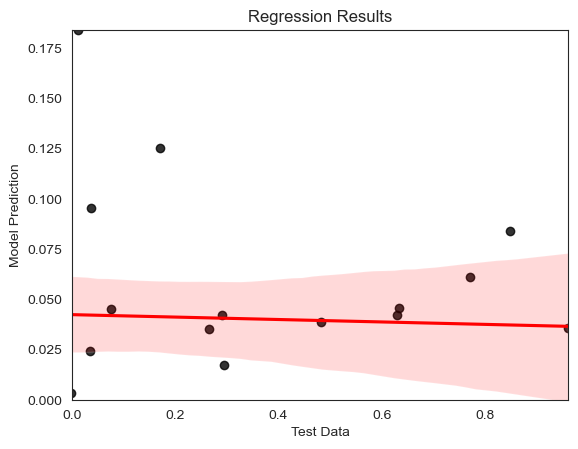

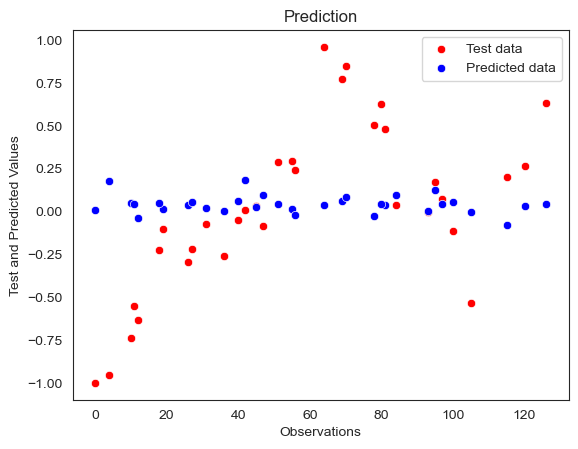

Mean Absolute Error: 0.3827585912778868
Mean Squared Error: 0.2370707160358154
Root Mean Squared Error: 0.48689908198292525
R Squared: -0.02644279503232605


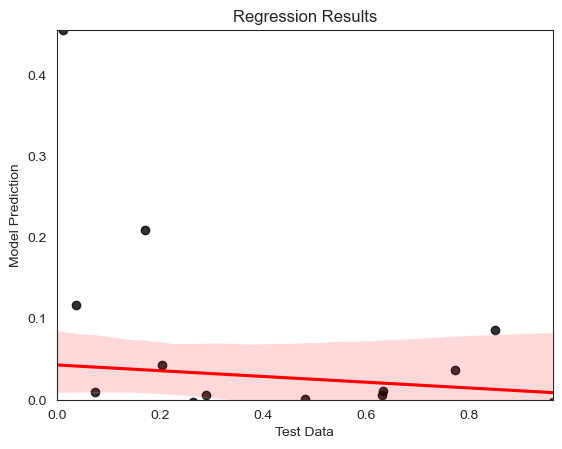

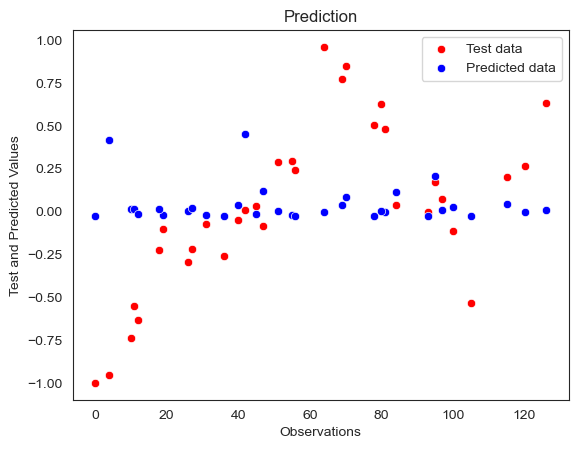

Mean Absolute Error: 0.39614845836825224
Mean Squared Error: 0.260494118431865
Root Mean Squared Error: 0.5103862443599602
R Squared: -0.1278588747008742


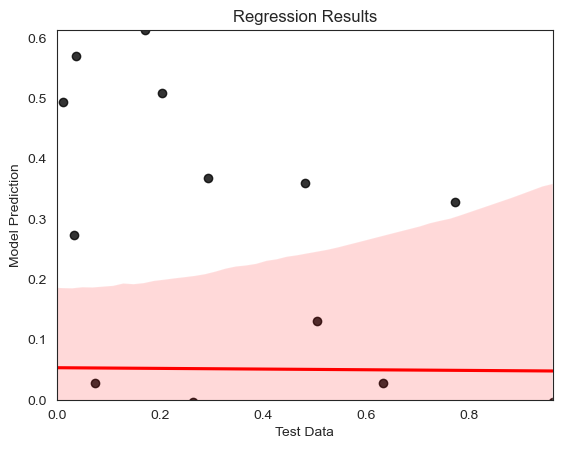

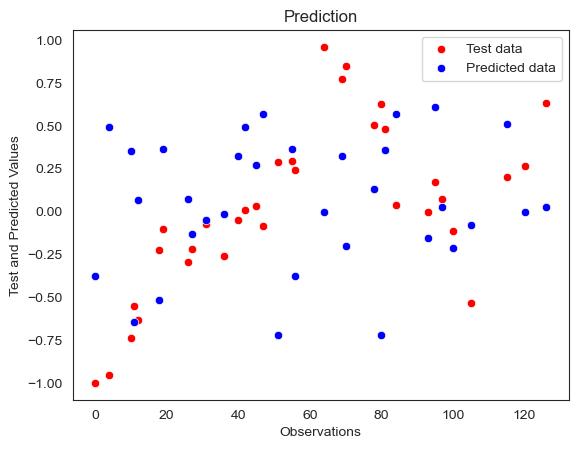

Mean Absolute Error: 0.4882580951741179
Mean Squared Error: 0.37583967932589607
Root Mean Squared Error: 0.6130576476367423
R Squared: -0.6272694383436399


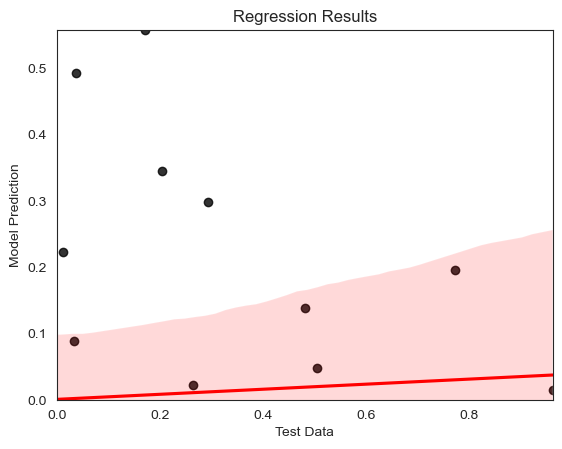

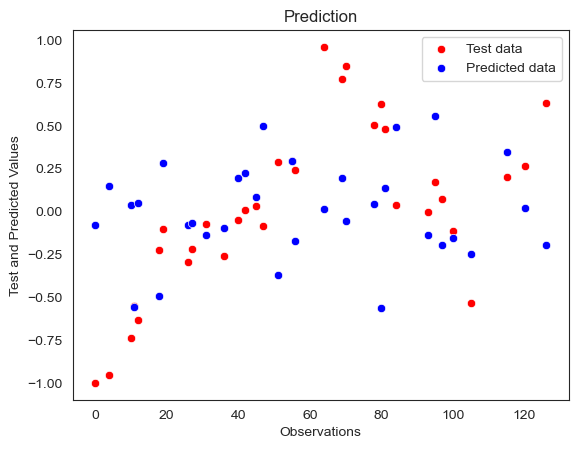

Mean Absolute Error: 0.4272982259919799
Mean Squared Error: 0.29056018071811046
Root Mean Squared Error: 0.5390363445242913
R Squared: -0.2580356148936507


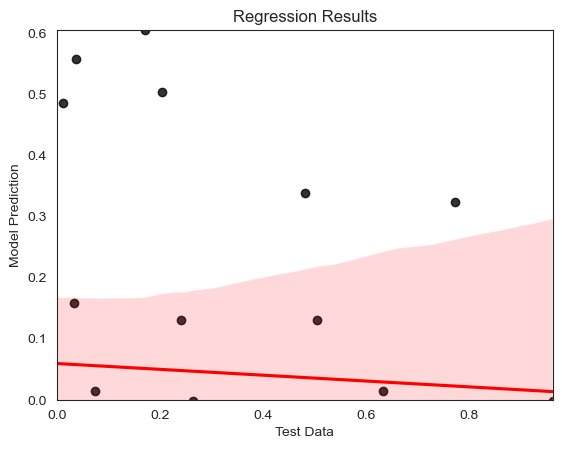

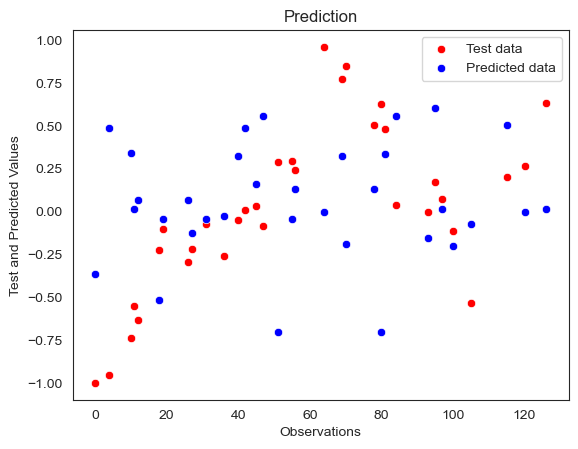

Mean Absolute Error: 0.47696611930201144
Mean Squared Error: 0.3644874219103003
Root Mean Squared Error: 0.6037279369967075
R Squared: -0.5781176787908906


,Model,R Squared
1,🥇 Linear Regression,-0.03
2,🥈 Support Vector Regression,-0.13
3,🥉 Random Forest Regression,-0.26
4,XGBoost Regression,-0.58
5,Decision Tree Regression,-0.63


In [134]:
from IPython.display import display, HTML

data_cont = mean_compound_trading_hours
# Move response variable (Normalized Adj Close) to the end of the DataFrame
data_cont = data_cont[[col for col in data_cont.columns if col != 'Normalized Adj Close'] + ['Normalized Adj Close']]



# Splitting the dataset - Make sure that the response variable is in the last column
X = data_cont[['mean_compound_trading_hours']]
y = data_cont['Normalized Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a dictionary to store R squared values for each regression model
r2_values = {}

display(HTML("<h1>mean_compound_trading_hours</h1>"))
# 1. Linear Regression
display(HTML("<h1>Linear Regression</h1>"))
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
reg_plot(y_test, y_pred_lin)
scatter_plot_comparison(y_test, y_pred_lin)
reg_metrics(y_test, y_pred_lin)
r2_values['Linear Regression'] = metrics.r2_score(y_test, y_pred_lin)

# 2. Support Vector Regression (SVR)
display(HTML("<h1>Support Vector Regression (SVR)</h1>"))
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)
reg_plot(y_test, y_pred_svr)
scatter_plot_comparison(y_test, y_pred_svr)
reg_metrics(y_test, y_pred_svr)
r2_values['Support Vector Regression'] = metrics.r2_score(y_test, y_pred_svr)

# 3. Decision Tree - Regression
display(HTML("<h1>Decision Tree - Regression</h1>"))
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
reg_plot(y_test, y_pred_dt)
scatter_plot_comparison(y_test, y_pred_dt)
reg_metrics(y_test, y_pred_dt)
r2_values['Decision Tree Regression'] = metrics.r2_score(y_test, y_pred_dt)

# 4. Random Forest - Regression
display(HTML("<h1>Random Forest - Regression</h1>"))
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
reg_plot(y_test, y_pred_rf)
scatter_plot_comparison(y_test, y_pred_rf)
reg_metrics(y_test, y_pred_rf)
r2_values['Random Forest Regression'] = metrics.r2_score(y_test, y_pred_rf)

# 5. XGBoost - Regression
display(HTML("<h1>XGBoost - Regression</h1>"))
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
reg_plot(y_test, y_pred_xgb)
scatter_plot_comparison(y_test, y_pred_xgb)
reg_metrics(y_test, y_pred_xgb)
r2_values['XGBoost Regression'] = metrics.r2_score(y_test, y_pred_xgb)

# Create a DataFrame to display R squared values and sort them by the highest value
r2_df = pd.DataFrame(list(r2_values.items()), columns=['Regression Type', 'R Squared'])
r2_df_sorted = r2_df.sort_values(by='R Squared', ascending=False)



# Create a list of model names and R Squared values, adding ranking symbols
sorted_r2 = r2_df_sorted.reset_index(drop=True)
sorted_r2['Ranking'] = ['🥇', '🥈', '🥉'] + [''] * (len(sorted_r2) - 3)

# Create a formatted DataFrame
formatted_df = pd.DataFrame({
    'Model': sorted_r2['Ranking'] + ' ' + sorted_r2['Regression Type'],
    'R Squared': sorted_r2['R Squared'].round(4)
})

# Set the index to start from 1 for rankings
formatted_df.index += 1




# Display the DataFrame
formatted_df




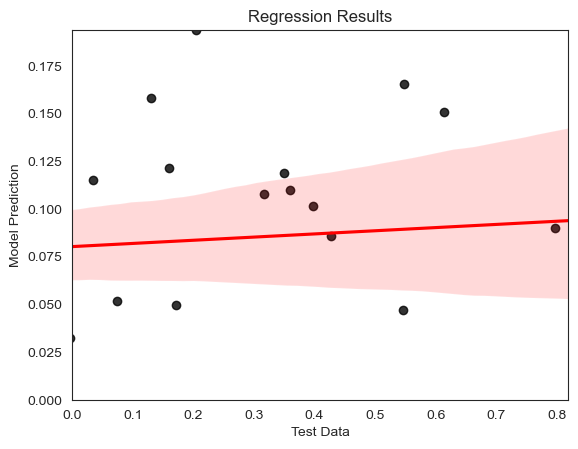

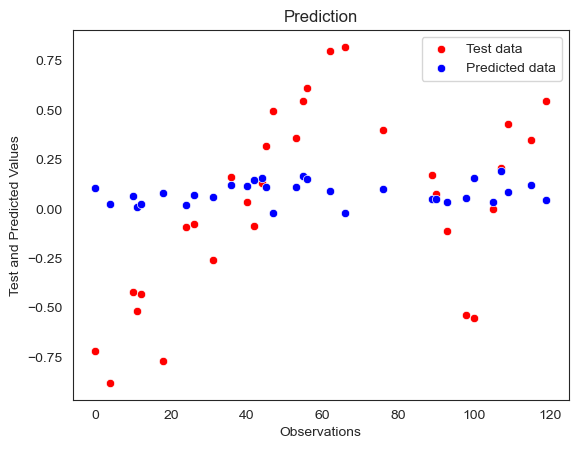

Mean Absolute Error: 0.36658572879359796
Mean Squared Error: 0.20843207921436313
Root Mean Squared Error: 0.45654362246598423
R Squared: 0.007558580899106104


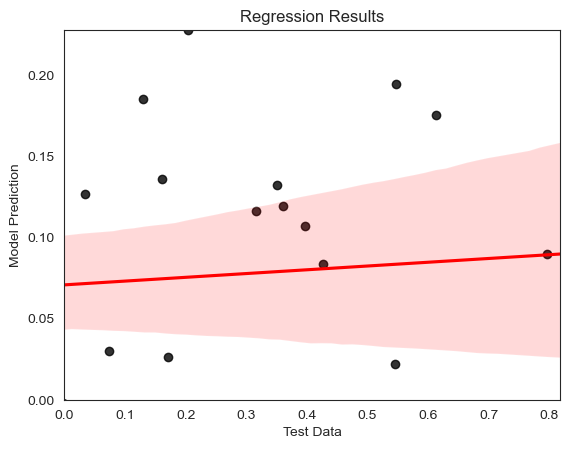

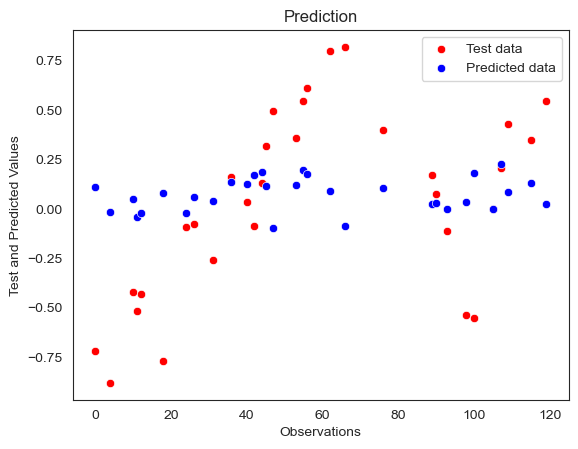

Mean Absolute Error: 0.3637672754408103
Mean Squared Error: 0.20873112803051835
Root Mean Squared Error: 0.4568710190311029
R Squared: 0.006134671332957531


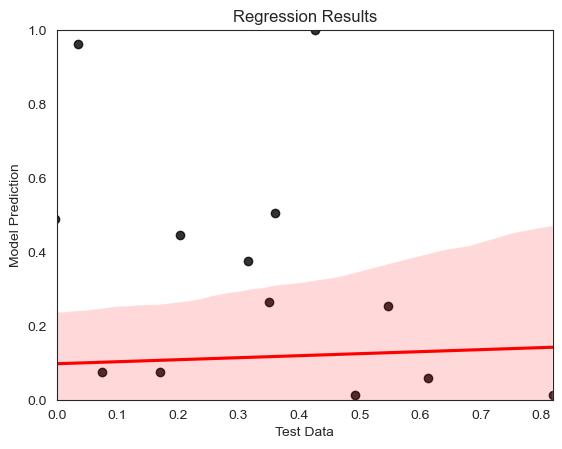

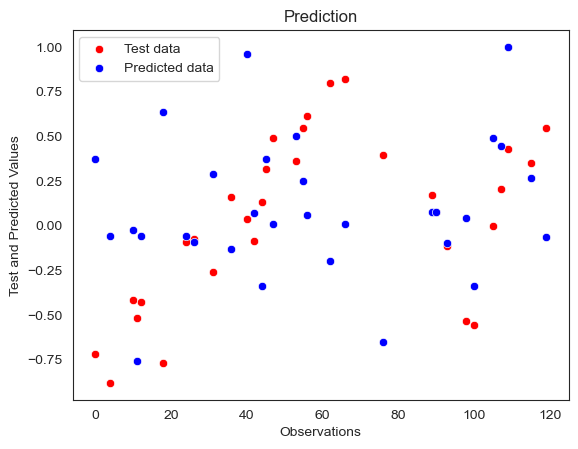

Mean Absolute Error: 0.45383741661294463
Mean Squared Error: 0.3383442926467429
Root Mean Squared Error: 0.5816736994628027
R Squared: -0.6110134831677216


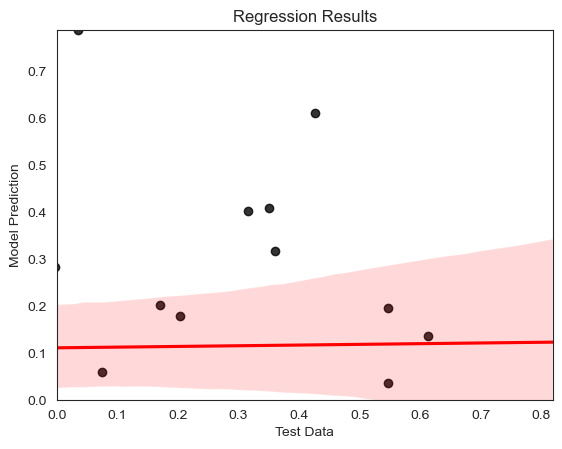

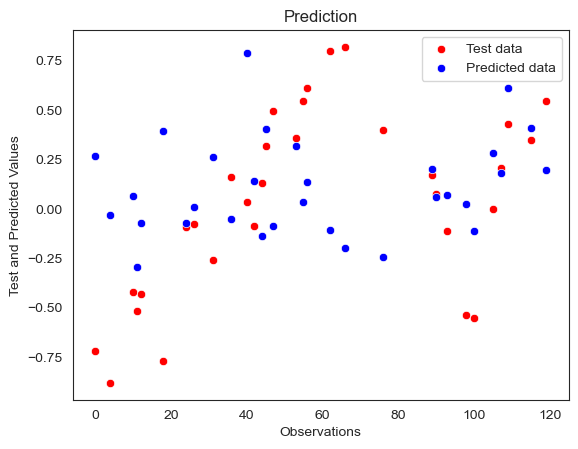

Mean Absolute Error: 0.40430256234730666
Mean Squared Error: 0.2690746990603041
Root Mean Squared Error: 0.5187241068817837
R Squared: -0.28118894743123746


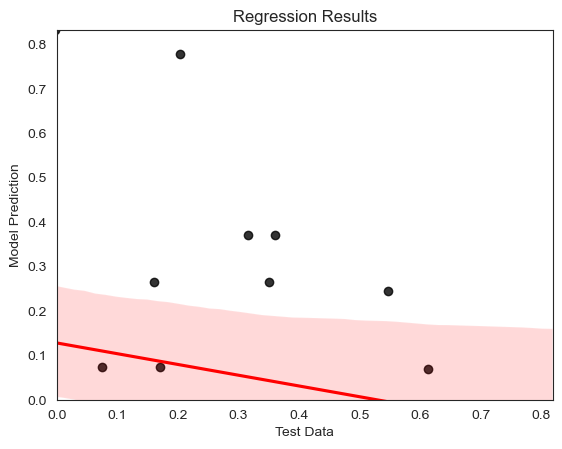

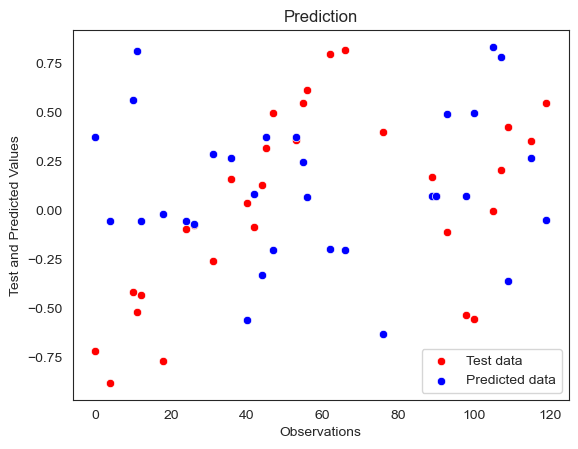

Mean Absolute Error: 0.5537817404516407
Mean Squared Error: 0.4526429780366512
Root Mean Squared Error: 0.6727874686976945
R Squared: -1.1552423271983217


,Model,R Squared
1,🥇 Linear Regression,0.01
2,🥈 Support Vector Regression,0.01
3,🥉 Random Forest Regression,-0.28
4,Decision Tree Regression,-0.61
5,XGBoost Regression,-1.16


In [135]:
from IPython.display import display, HTML

data_cont = mean_compound_after_4pm_before_930am
# Move response variable (Normalized Adj Close) to the end of the DataFrame
data_cont = data_cont[[col for col in data_cont.columns if col != 'Normalized Adj Close'] + ['Normalized Adj Close']]



# Splitting the dataset - Make sure that the response variable is in the last column
X = data_cont[['mean_compound_after_4pm_before_930am']]
y = data_cont['Normalized Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a dictionary to store R squared values for each regression model
r2_values = {}

display(HTML("<h1>mean_compound_after_4pm_before_930am</h1>"))
# 1. Linear Regression
display(HTML("<h1>Linear Regression</h1>"))
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
reg_plot(y_test, y_pred_lin)
scatter_plot_comparison(y_test, y_pred_lin)
reg_metrics(y_test, y_pred_lin)
r2_values['Linear Regression'] = metrics.r2_score(y_test, y_pred_lin)

# 2. Support Vector Regression (SVR)
display(HTML("<h1>Support Vector Regression (SVR)</h1>"))
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)
reg_plot(y_test, y_pred_svr)
scatter_plot_comparison(y_test, y_pred_svr)
reg_metrics(y_test, y_pred_svr)
r2_values['Support Vector Regression'] = metrics.r2_score(y_test, y_pred_svr)

# 3. Decision Tree - Regression
display(HTML("<h1>Decision Tree - Regression</h1>"))
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
reg_plot(y_test, y_pred_dt)
scatter_plot_comparison(y_test, y_pred_dt)
reg_metrics(y_test, y_pred_dt)
r2_values['Decision Tree Regression'] = metrics.r2_score(y_test, y_pred_dt)

# 4. Random Forest - Regression
display(HTML("<h1>Random Forest - Regression</h1>"))
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
reg_plot(y_test, y_pred_rf)
scatter_plot_comparison(y_test, y_pred_rf)
reg_metrics(y_test, y_pred_rf)
r2_values['Random Forest Regression'] = metrics.r2_score(y_test, y_pred_rf)

# 5. XGBoost - Regression
display(HTML("<h1>XGBoost - Regression</h1>"))
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
reg_plot(y_test, y_pred_xgb)
scatter_plot_comparison(y_test, y_pred_xgb)
reg_metrics(y_test, y_pred_xgb)
r2_values['XGBoost Regression'] = metrics.r2_score(y_test, y_pred_xgb)

# Create a DataFrame to display R squared values and sort them by the highest value
r2_df = pd.DataFrame(list(r2_values.items()), columns=['Regression Type', 'R Squared'])
r2_df_sorted = r2_df.sort_values(by='R Squared', ascending=False)



# Create a list of model names and R Squared values, adding ranking symbols
sorted_r2 = r2_df_sorted.reset_index(drop=True)
sorted_r2['Ranking'] = ['🥇', '🥈', '🥉'] + [''] * (len(sorted_r2) - 3)

# Create a formatted DataFrame
formatted_df = pd.DataFrame({
    'Model': sorted_r2['Ranking'] + ' ' + sorted_r2['Regression Type'],
    'R Squared': sorted_r2['R Squared'].round(4)
})

# Set the index to start from 1 for rankings
formatted_df.index += 1




# Display the DataFrame
formatted_df




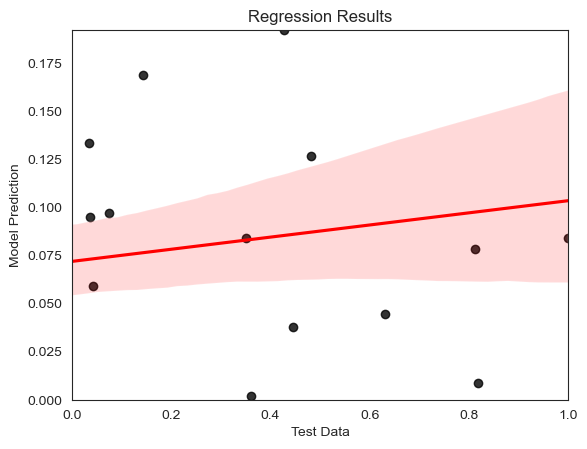

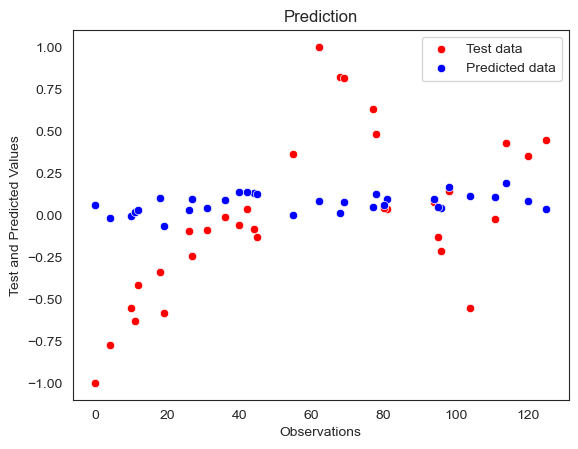

Mean Absolute Error: 0.3721291214155292
Mean Squared Error: 0.2154211837080474
Root Mean Squared Error: 0.4641348766339881
R Squared: 0.019537245832394134


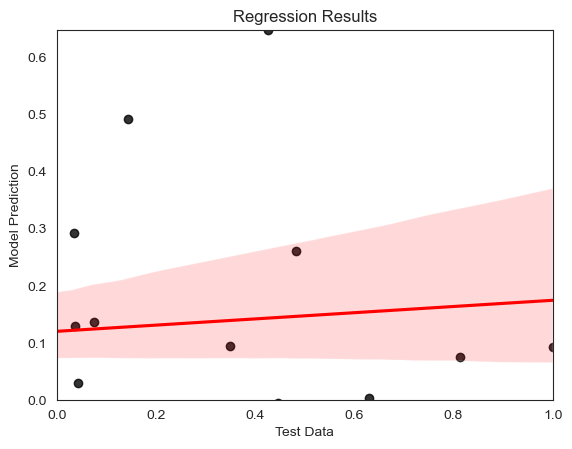

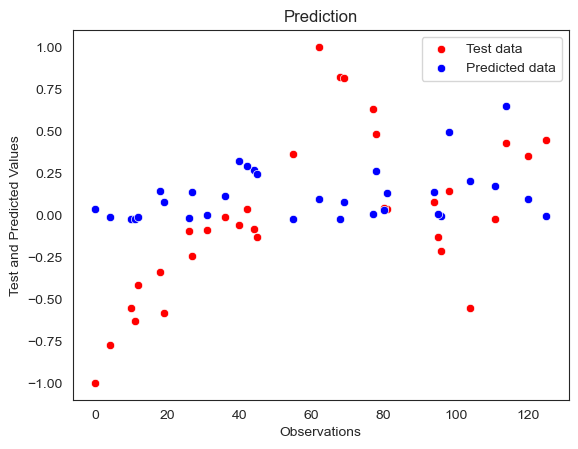

Mean Absolute Error: 0.4058919775893861
Mean Squared Error: 0.23681975465704058
Root Mean Squared Error: 0.486641299785623
R Squared: -0.07785569132802417


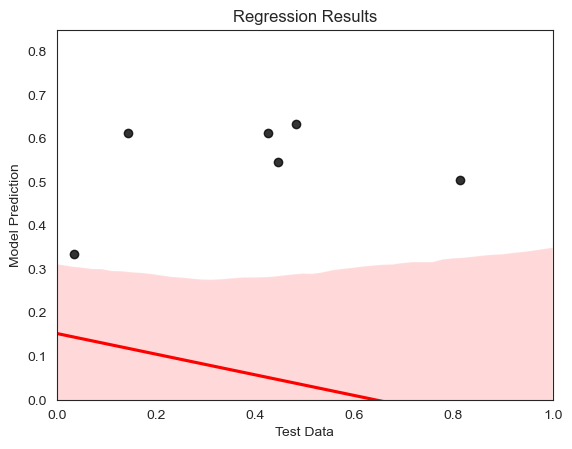

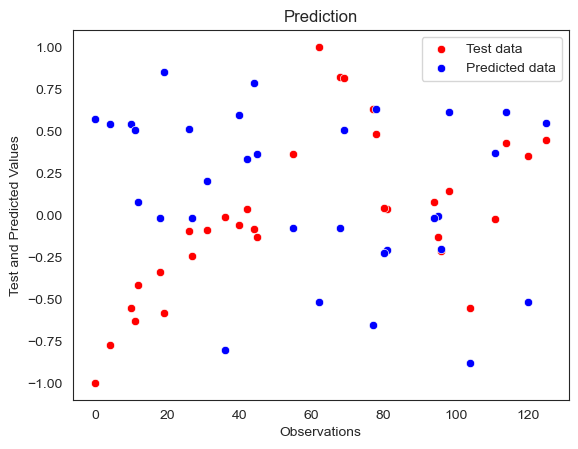

Mean Absolute Error: 0.6023894176692647
Mean Squared Error: 0.5699833795064262
Root Mean Squared Error: 0.7549724362560704
R Squared: -1.5942085382745659


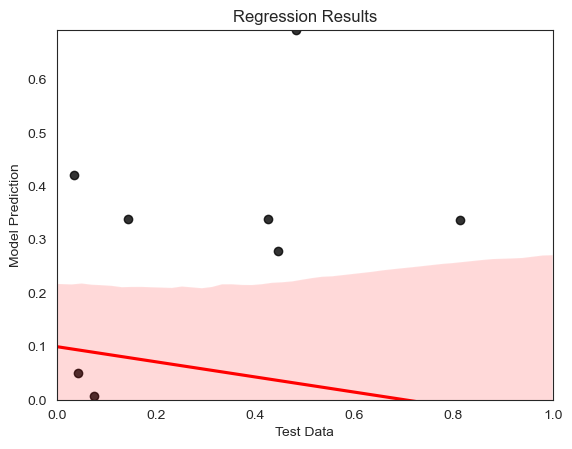

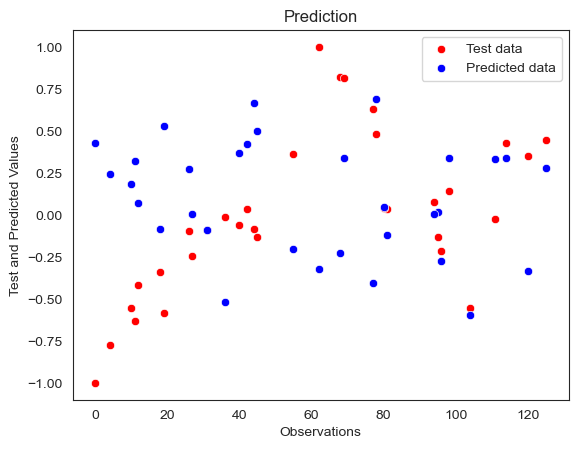

Mean Absolute Error: 0.4984057923605467
Mean Squared Error: 0.4079265360193923
Root Mean Squared Error: 0.6386912681565268
R Squared: -0.8566269487483253


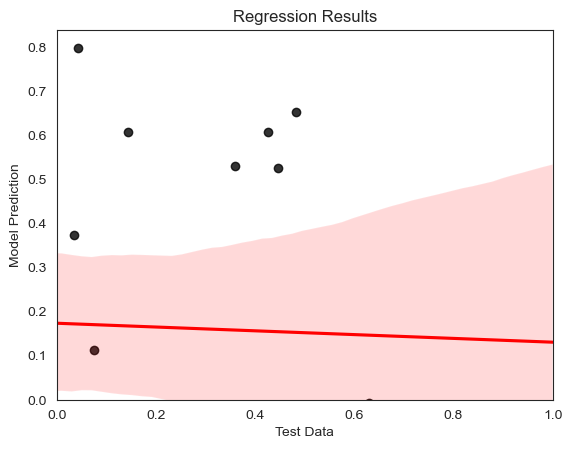

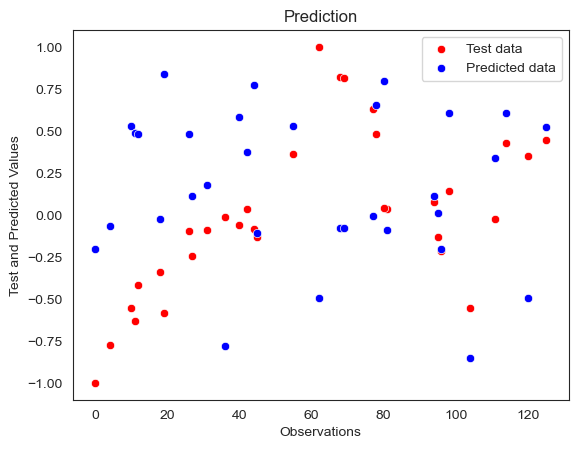

Mean Absolute Error: 0.5547832902130625
Mean Squared Error: 0.4682565288367483
Root Mean Squared Error: 0.684292721601471
R Squared: -1.1312114157837603


,Model,R Squared
1,🥇 Linear Regression,0.02
2,🥈 Support Vector Regression,-0.08
3,🥉 Random Forest Regression,-0.86
4,XGBoost Regression,-1.13
5,Decision Tree Regression,-1.59


In [136]:
from IPython.display import display, HTML

data_cont = mean_compound_per_day_without_other
# Move response variable (Normalized Adj Close) to the end of the DataFrame
data_cont = data_cont[[col for col in data_cont.columns if col != 'Normalized Adj Close'] + ['Normalized Adj Close']]



# Splitting the dataset - Make sure that the response variable is in the last column
X = data_cont[['mean_compound_CrudeOil_GreenEnergy']]
y = data_cont['Normalized Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a dictionary to store R squared values for each regression model
r2_values = {}

display(HTML("<h1>mean_compound_per_day_without_other</h1>"))
# 1. Linear Regression
display(HTML("<h1>Linear Regression</h1>"))
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
reg_plot(y_test, y_pred_lin)
scatter_plot_comparison(y_test, y_pred_lin)
reg_metrics(y_test, y_pred_lin)
r2_values['Linear Regression'] = metrics.r2_score(y_test, y_pred_lin)

# 2. Support Vector Regression (SVR)
display(HTML("<h1>Support Vector Regression (SVR)</h1>"))
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)
reg_plot(y_test, y_pred_svr)
scatter_plot_comparison(y_test, y_pred_svr)
reg_metrics(y_test, y_pred_svr)
r2_values['Support Vector Regression'] = metrics.r2_score(y_test, y_pred_svr)

# 3. Decision Tree - Regression
display(HTML("<h1>Decision Tree - Regression</h1>"))
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
reg_plot(y_test, y_pred_dt)
scatter_plot_comparison(y_test, y_pred_dt)
reg_metrics(y_test, y_pred_dt)
r2_values['Decision Tree Regression'] = metrics.r2_score(y_test, y_pred_dt)

# 4. Random Forest - Regression
display(HTML("<h1>Random Forest - Regression</h1>"))
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
reg_plot(y_test, y_pred_rf)
scatter_plot_comparison(y_test, y_pred_rf)
reg_metrics(y_test, y_pred_rf)
r2_values['Random Forest Regression'] = metrics.r2_score(y_test, y_pred_rf)

# 5. XGBoost - Regression
display(HTML("<h1>XGBoost - Regression</h1>"))
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
reg_plot(y_test, y_pred_xgb)
scatter_plot_comparison(y_test, y_pred_xgb)
reg_metrics(y_test, y_pred_xgb)
r2_values['XGBoost Regression'] = metrics.r2_score(y_test, y_pred_xgb)

# Create a DataFrame to display R squared values and sort them by the highest value
r2_df = pd.DataFrame(list(r2_values.items()), columns=['Regression Type', 'R Squared'])
r2_df_sorted = r2_df.sort_values(by='R Squared', ascending=False)



# Create a list of model names and R Squared values, adding ranking symbols
sorted_r2 = r2_df_sorted.reset_index(drop=True)
sorted_r2['Ranking'] = ['🥇', '🥈', '🥉'] + [''] * (len(sorted_r2) - 3)

# Create a formatted DataFrame
formatted_df = pd.DataFrame({
    'Model': sorted_r2['Ranking'] + ' ' + sorted_r2['Regression Type'],
    'R Squared': sorted_r2['R Squared'].round(4)
})

# Set the index to start from 1 for rankings
formatted_df.index += 1




# Display the DataFrame
formatted_df




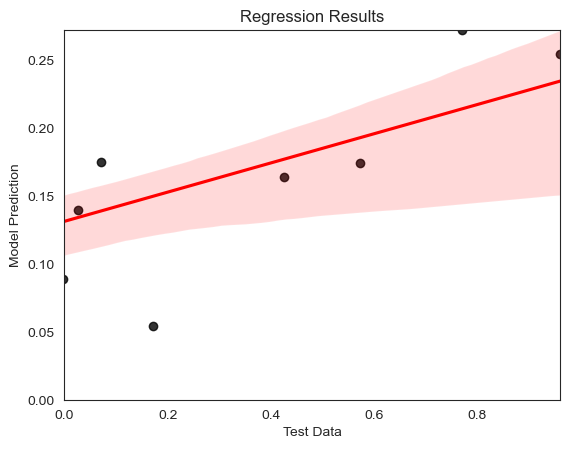

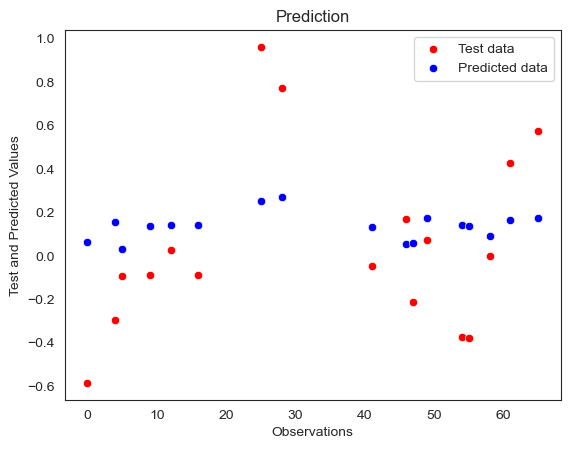

Mean Absolute Error: 0.32079643087144744
Mean Squared Error: 0.14121559791300065
Root Mean Squared Error: 0.3757866388164974
R Squared: 0.14443729180386777


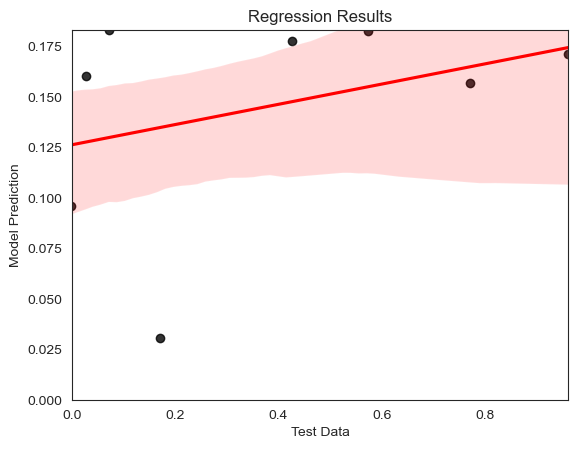

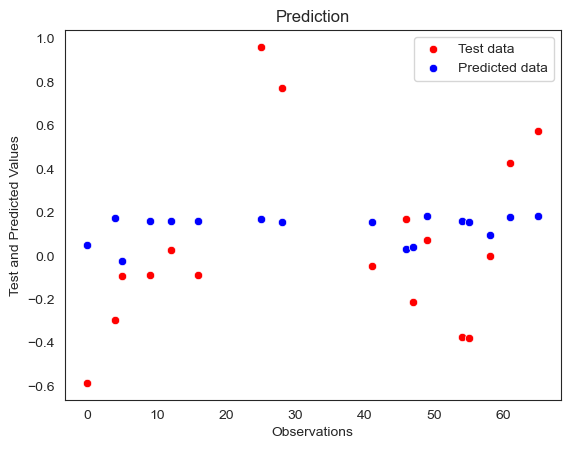

Mean Absolute Error: 0.33640972249532947
Mean Squared Error: 0.15876558355665416
Root Mean Squared Error: 0.3984539917690048
R Squared: 0.038109708534080244


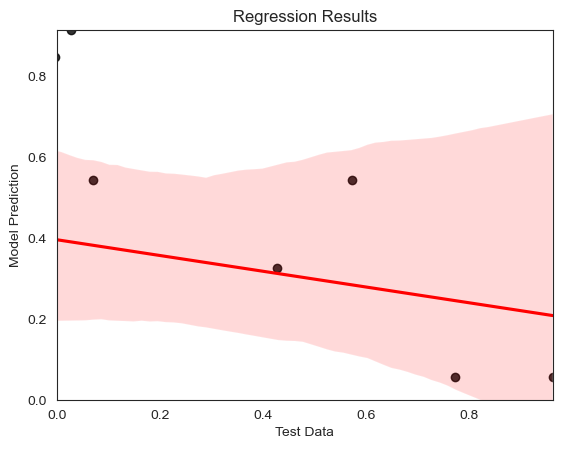

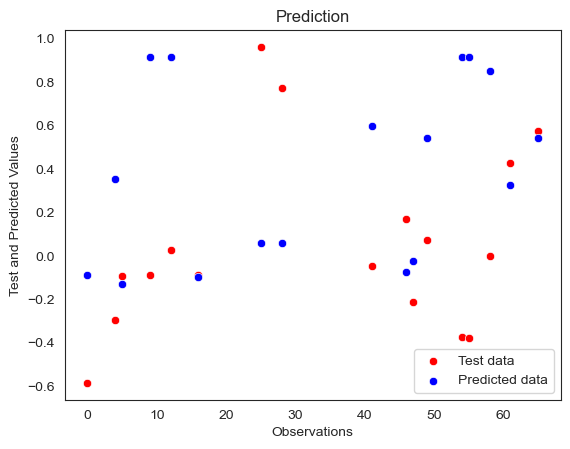

Mean Absolute Error: 0.5774879001748371
Mean Squared Error: 0.5055105271527072
Root Mean Squared Error: 0.7109926350903413
R Squared: -2.062664195911802


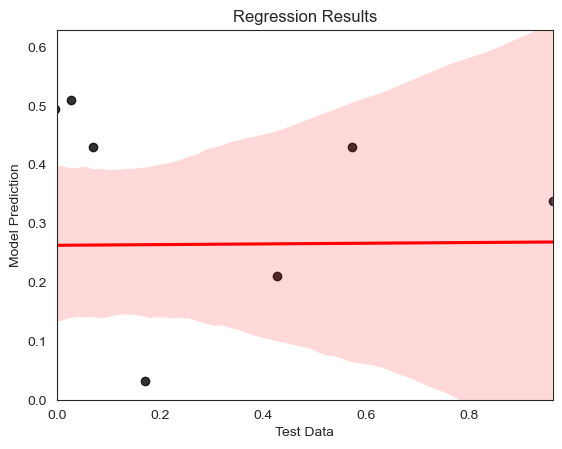

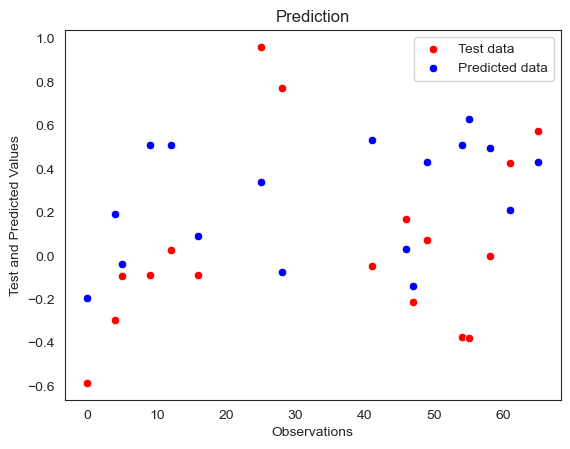

Mean Absolute Error: 0.44488836927612707
Mean Squared Error: 0.2774947696855772
Root Mean Squared Error: 0.5267777232244898
R Squared: -0.6812177986791461


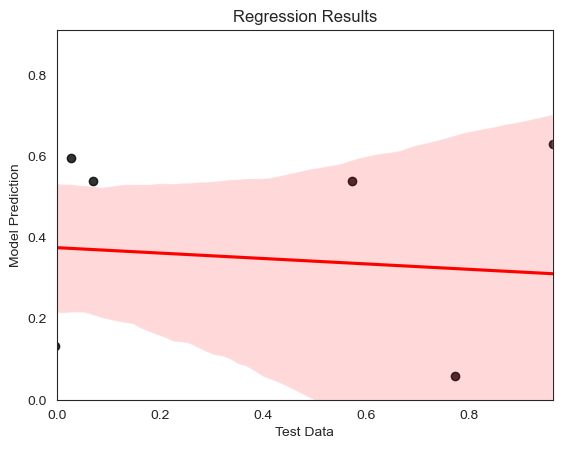

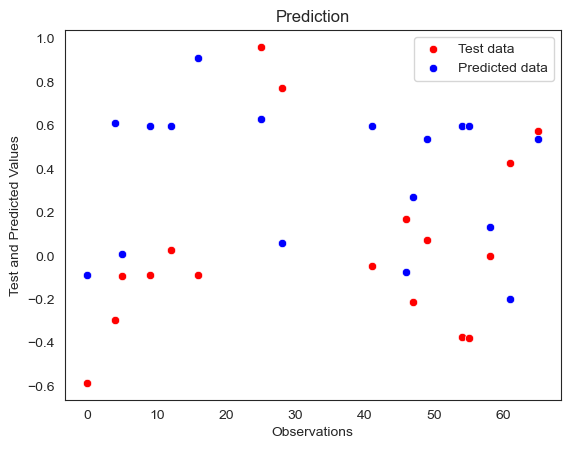

Mean Absolute Error: 0.551363263790583
Mean Squared Error: 0.39421079922391117
Root Mean Squared Error: 0.6278620861494275
R Squared: -1.388348482523552


,Model,R Squared
1,🥇 Linear Regression,0.14
2,🥈 Support Vector Regression,0.04
3,🥉 Random Forest Regression,-0.68
4,XGBoost Regression,-1.39
5,Decision Tree Regression,-2.06


In [137]:
from IPython.display import display, HTML

data_cont = mean_compound_before_930am_without_other
# Move response variable (Normalized Adj Close) to the end of the DataFrame
data_cont = data_cont[[col for col in data_cont.columns if col != 'Normalized Adj Close'] + ['Normalized Adj Close']]



# Splitting the dataset - Make sure that the response variable is in the last column
X = data_cont[['mean_compound_before_930am']]
y = data_cont['Normalized Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a dictionary to store R squared values for each regression model
r2_values = {}

display(HTML("<h1>mean_compound_before_930am_without_other</h1>"))
# 1. Linear Regression
display(HTML("<h1>Linear Regression</h1>"))
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
reg_plot(y_test, y_pred_lin)
scatter_plot_comparison(y_test, y_pred_lin)
reg_metrics(y_test, y_pred_lin)
r2_values['Linear Regression'] = metrics.r2_score(y_test, y_pred_lin)

# 2. Support Vector Regression (SVR)
display(HTML("<h1>Support Vector Regression (SVR)</h1>"))
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)
reg_plot(y_test, y_pred_svr)
scatter_plot_comparison(y_test, y_pred_svr)
reg_metrics(y_test, y_pred_svr)
r2_values['Support Vector Regression'] = metrics.r2_score(y_test, y_pred_svr)

# 3. Decision Tree - Regression
display(HTML("<h1>Decision Tree - Regression</h1>"))
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
reg_plot(y_test, y_pred_dt)
scatter_plot_comparison(y_test, y_pred_dt)
reg_metrics(y_test, y_pred_dt)
r2_values['Decision Tree Regression'] = metrics.r2_score(y_test, y_pred_dt)

# 4. Random Forest - Regression
display(HTML("<h1>Random Forest - Regression</h1>"))
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
reg_plot(y_test, y_pred_rf)
scatter_plot_comparison(y_test, y_pred_rf)
reg_metrics(y_test, y_pred_rf)
r2_values['Random Forest Regression'] = metrics.r2_score(y_test, y_pred_rf)

# 5. XGBoost - Regression
display(HTML("<h1>XGBoost - Regression</h1>"))
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
reg_plot(y_test, y_pred_xgb)
scatter_plot_comparison(y_test, y_pred_xgb)
reg_metrics(y_test, y_pred_xgb)
r2_values['XGBoost Regression'] = metrics.r2_score(y_test, y_pred_xgb)

# Create a DataFrame to display R squared values and sort them by the highest value
r2_df = pd.DataFrame(list(r2_values.items()), columns=['Regression Type', 'R Squared'])
r2_df_sorted = r2_df.sort_values(by='R Squared', ascending=False)



# Create a list of model names and R Squared values, adding ranking symbols
sorted_r2 = r2_df_sorted.reset_index(drop=True)
sorted_r2['Ranking'] = ['🥇', '🥈', '🥉'] + [''] * (len(sorted_r2) - 3)

# Create a formatted DataFrame
formatted_df = pd.DataFrame({
    'Model': sorted_r2['Ranking'] + ' ' + sorted_r2['Regression Type'],
    'R Squared': sorted_r2['R Squared'].round(4)
})

# Set the index to start from 1 for rankings
formatted_df.index += 1




# Display the DataFrame
formatted_df




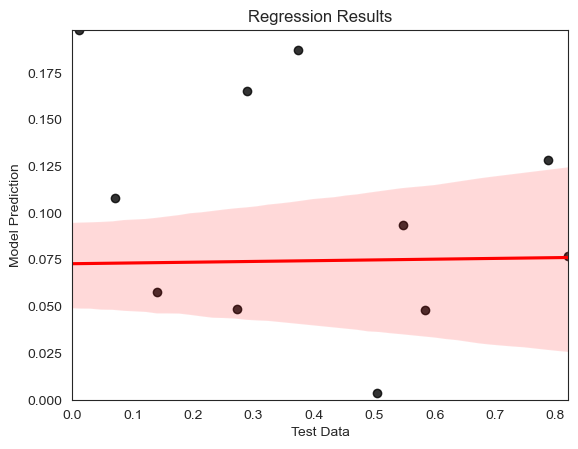

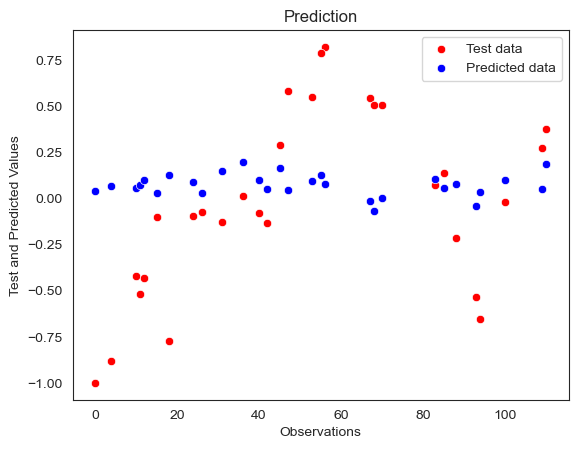

Mean Absolute Error: 0.41336861553476406
Mean Squared Error: 0.24739272949923508
Root Mean Squared Error: 0.4973858959592995
R Squared: -0.04395499781247869


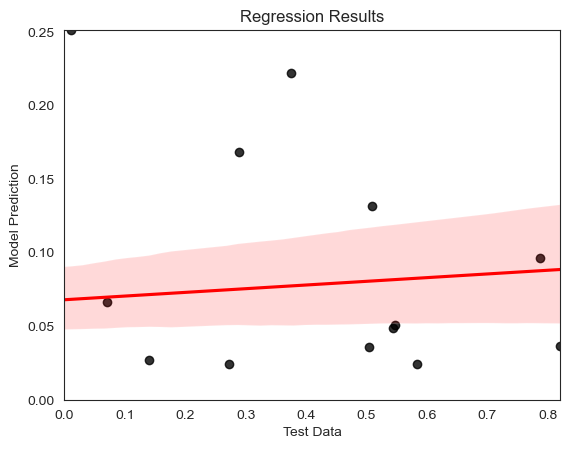

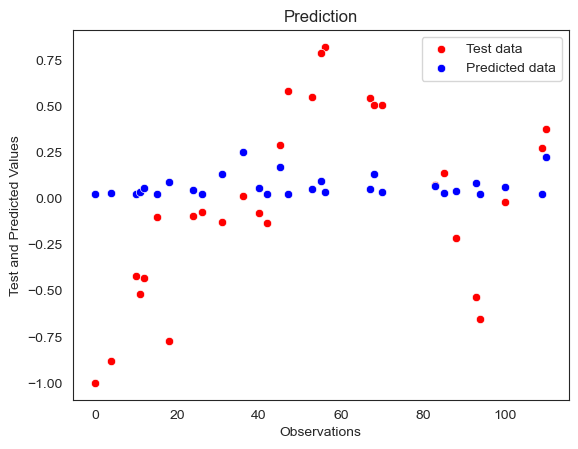

Mean Absolute Error: 0.3987841037366722
Mean Squared Error: 0.23625762892620458
Root Mean Squared Error: 0.48606340010970234
R Squared: 0.0030332217600602673


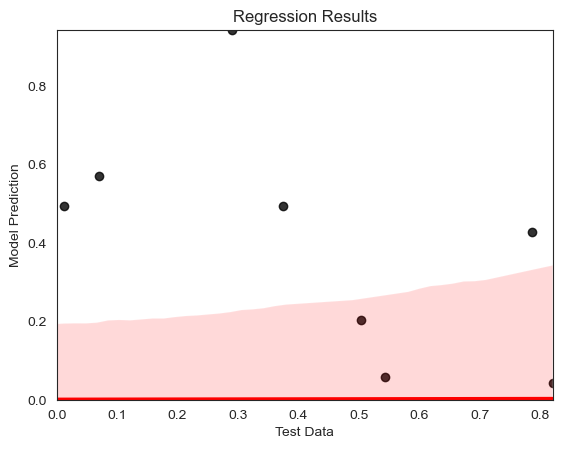

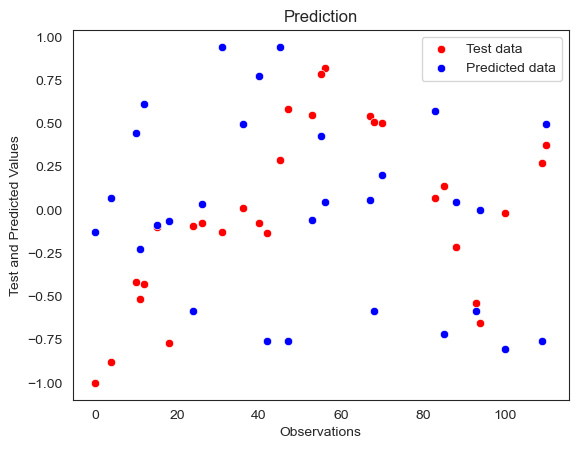

Mean Absolute Error: 0.6284079186454152
Mean Squared Error: 0.5113522716808475
Root Mean Squared Error: 0.7150889956368001
R Squared: -1.157819111113513


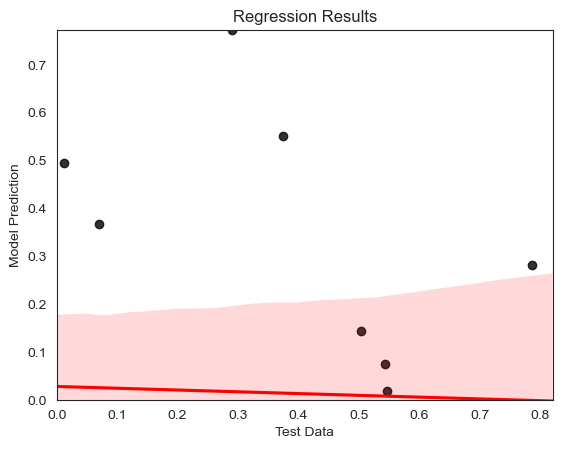

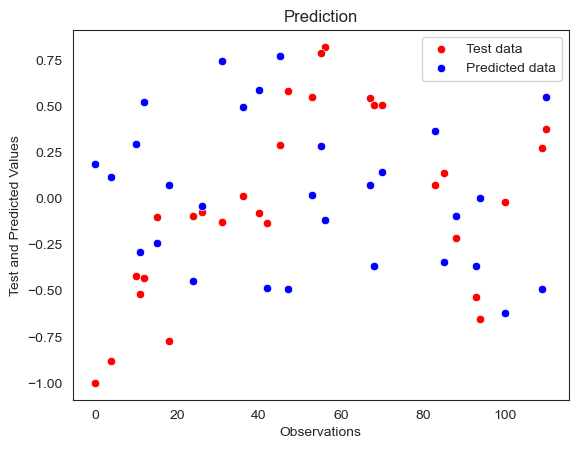

Mean Absolute Error: 0.5633007295533079
Mean Squared Error: 0.41349108166049414
Root Mean Squared Error: 0.6430327220760186
R Squared: -0.7448616300249651


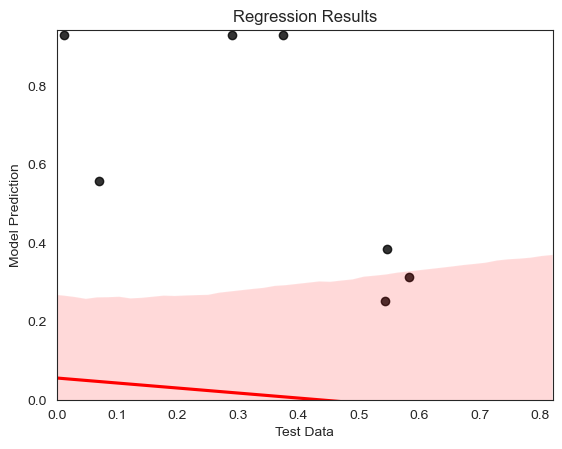

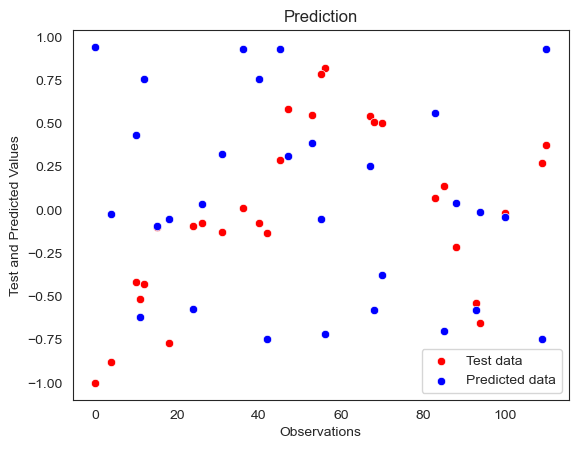

Mean Absolute Error: 0.6423793034626999
Mean Squared Error: 0.6168973819116053
Root Mean Squared Error: 0.7854281519729257
R Squared: -1.6032014210265824


,Model,R Squared
1,🥇 Support Vector Regression,0.00
2,🥈 Linear Regression,-0.04
3,🥉 Random Forest Regression,-0.74
4,Decision Tree Regression,-1.16
5,XGBoost Regression,-1.60


In [138]:
from IPython.display import display, HTML

data_cont = mean_compound_trading_hours_without_other
# Move response variable (Normalized Adj Close) to the end of the DataFrame
data_cont = data_cont[[col for col in data_cont.columns if col != 'Normalized Adj Close'] + ['Normalized Adj Close']]



# Splitting the dataset - Make sure that the response variable is in the last column
X = data_cont[['mean_compound_trading_hours']]
y = data_cont['Normalized Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a dictionary to store R squared values for each regression model
r2_values = {}

display(HTML("<h1>mean_compound_trading_hours_without_other</h1>"))
# 1. Linear Regression
display(HTML("<h1>Linear Regression</h1>"))
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
reg_plot(y_test, y_pred_lin)
scatter_plot_comparison(y_test, y_pred_lin)
reg_metrics(y_test, y_pred_lin)
r2_values['Linear Regression'] = metrics.r2_score(y_test, y_pred_lin)

# 2. Support Vector Regression (SVR)
display(HTML("<h1>Support Vector Regression (SVR)</h1>"))
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)
reg_plot(y_test, y_pred_svr)
scatter_plot_comparison(y_test, y_pred_svr)
reg_metrics(y_test, y_pred_svr)
r2_values['Support Vector Regression'] = metrics.r2_score(y_test, y_pred_svr)

# 3. Decision Tree - Regression
display(HTML("<h1>Decision Tree - Regression</h1>"))
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
reg_plot(y_test, y_pred_dt)
scatter_plot_comparison(y_test, y_pred_dt)
reg_metrics(y_test, y_pred_dt)
r2_values['Decision Tree Regression'] = metrics.r2_score(y_test, y_pred_dt)

# 4. Random Forest - Regression
display(HTML("<h1>Random Forest - Regression</h1>"))
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
reg_plot(y_test, y_pred_rf)
scatter_plot_comparison(y_test, y_pred_rf)
reg_metrics(y_test, y_pred_rf)
r2_values['Random Forest Regression'] = metrics.r2_score(y_test, y_pred_rf)

# 5. XGBoost - Regression
display(HTML("<h1>XGBoost - Regression</h1>"))
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
reg_plot(y_test, y_pred_xgb)
scatter_plot_comparison(y_test, y_pred_xgb)
reg_metrics(y_test, y_pred_xgb)
r2_values['XGBoost Regression'] = metrics.r2_score(y_test, y_pred_xgb)

# Create a DataFrame to display R squared values and sort them by the highest value
r2_df = pd.DataFrame(list(r2_values.items()), columns=['Regression Type', 'R Squared'])
r2_df_sorted = r2_df.sort_values(by='R Squared', ascending=False)



# Create a list of model names and R Squared values, adding ranking symbols
sorted_r2 = r2_df_sorted.reset_index(drop=True)
sorted_r2['Ranking'] = ['🥇', '🥈', '🥉'] + [''] * (len(sorted_r2) - 3)

# Create a formatted DataFrame
formatted_df = pd.DataFrame({
    'Model': sorted_r2['Ranking'] + ' ' + sorted_r2['Regression Type'],
    'R Squared': sorted_r2['R Squared'].round(4)
})

# Set the index to start from 1 for rankings
formatted_df.index += 1




# Display the DataFrame
formatted_df




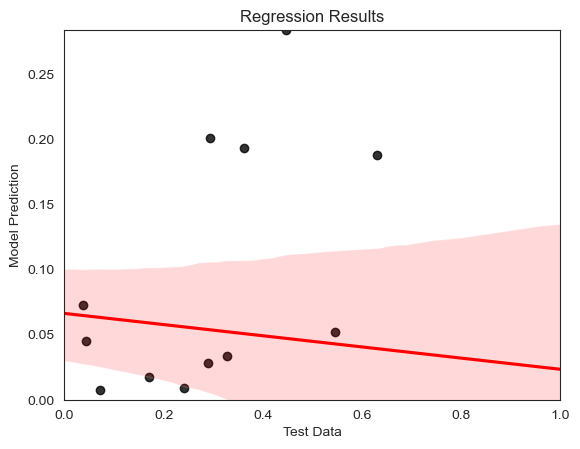

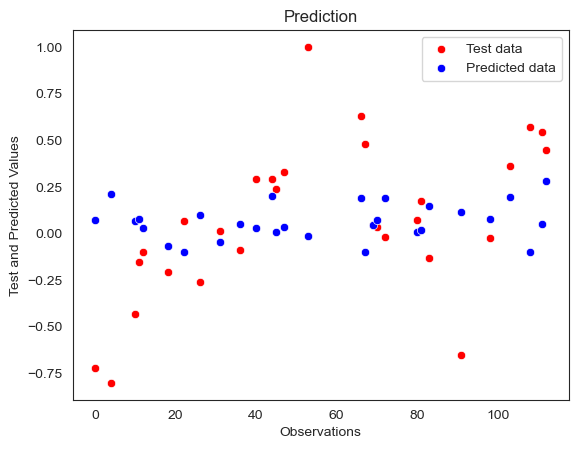

Mean Absolute Error: 0.32916709980125447
Mean Squared Error: 0.1879758899656124
Root Mean Squared Error: 0.43356186405818997
R Squared: -0.14379270359570429


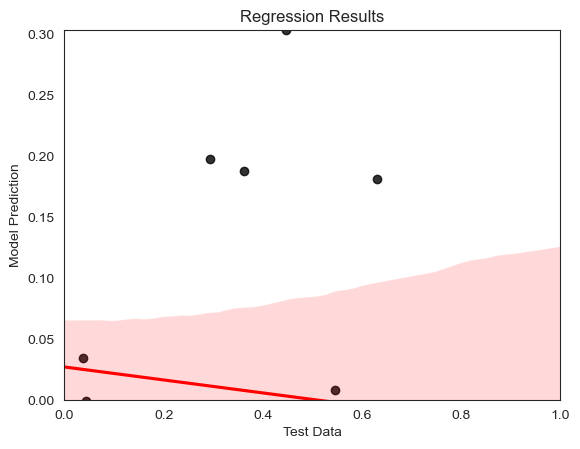

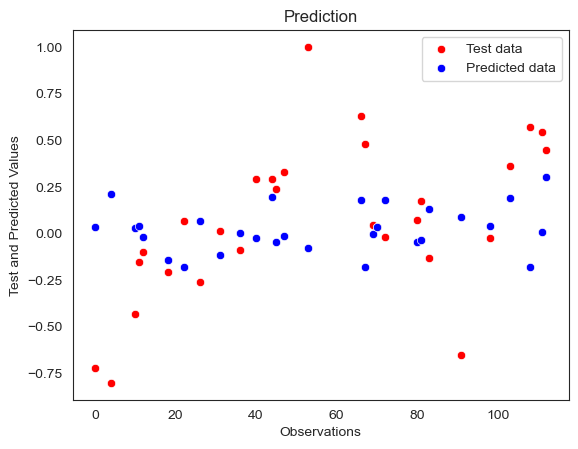

Mean Absolute Error: 0.3386630960741304
Mean Squared Error: 0.19911386083315885
Root Mean Squared Error: 0.44622176194484153
R Squared: -0.2115648514679216


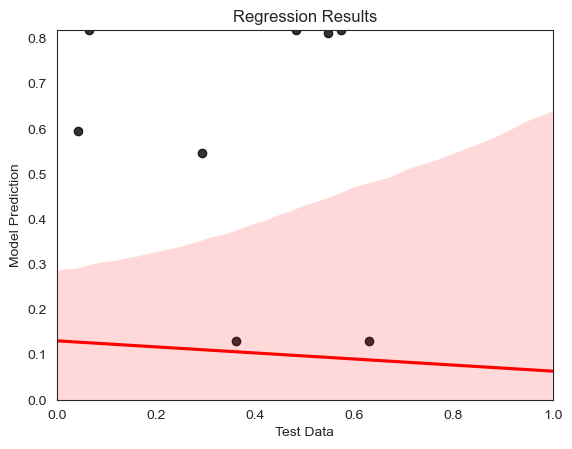

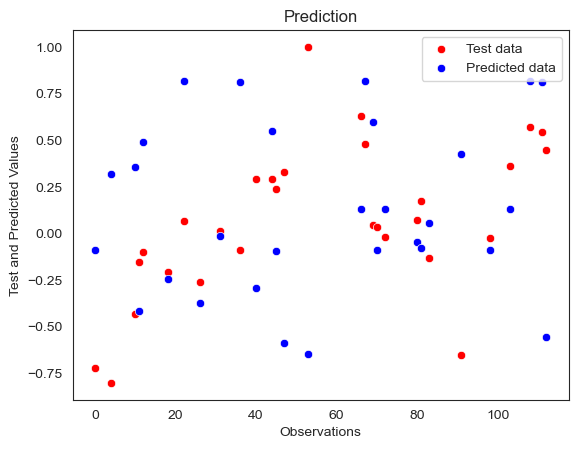

Mean Absolute Error: 0.48413524386909224
Mean Squared Error: 0.38939673714115774
Root Mean Squared Error: 0.6240166160777754
R Squared: -1.3693950688437138


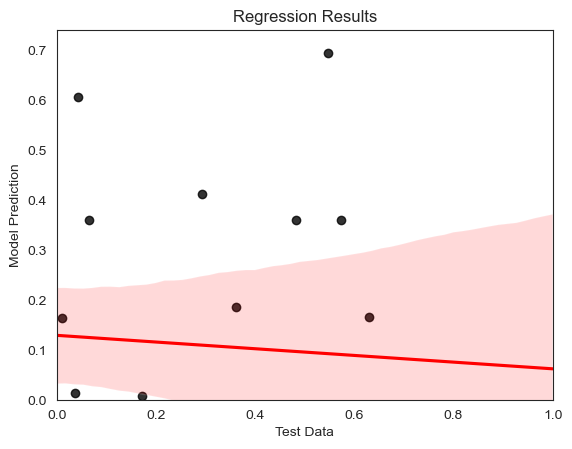

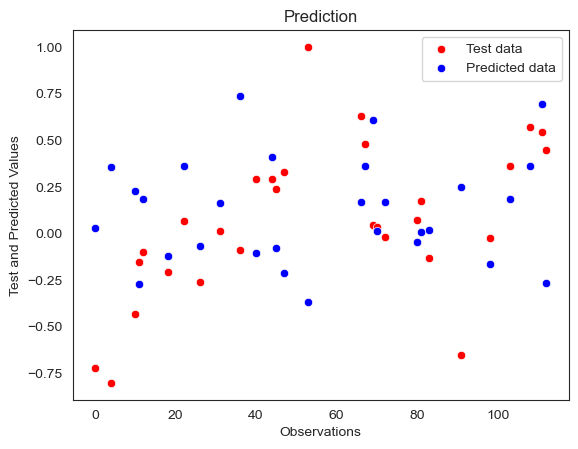

Mean Absolute Error: 0.3906500306237224
Mean Squared Error: 0.26837278321712815
Root Mean Squared Error: 0.5180470859073798
R Squared: -0.6329904401228128


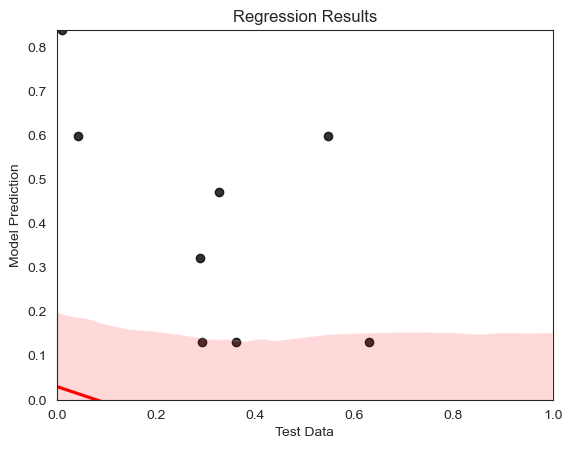

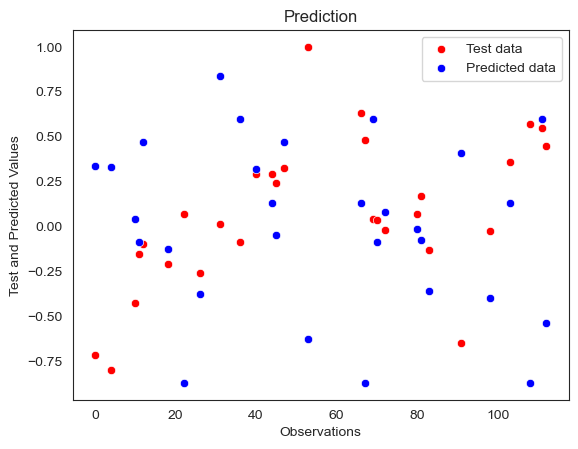

Mean Absolute Error: 0.5362177366701281
Mean Squared Error: 0.5072817984061545
Root Mean Squared Error: 0.7122371784778961
R Squared: -2.0867002134689225


,Model,R Squared
1,🥇 Linear Regression,-0.14
2,🥈 Support Vector Regression,-0.21
3,🥉 Random Forest Regression,-0.63
4,Decision Tree Regression,-1.37
5,XGBoost Regression,-2.09


In [139]:
from IPython.display import display, HTML

data_cont = mean_compound_after_4pm_before_930am_without_other
# Move response variable (Normalized Adj Close) to the end of the DataFrame
data_cont = data_cont[[col for col in data_cont.columns if col != 'Normalized Adj Close'] + ['Normalized Adj Close']]



# Splitting the dataset - Make sure that the response variable is in the last column
X = data_cont[['mean_compound_after_4pm_before_930am']]
y = data_cont['Normalized Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a dictionary to store R squared values for each regression model
r2_values = {}

display(HTML("<h1>mean_compound_after_4pm_before_930am_without_other</h1>"))
# 1. Linear Regression
display(HTML("<h1>Linear Regression</h1>"))
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
reg_plot(y_test, y_pred_lin)
scatter_plot_comparison(y_test, y_pred_lin)
reg_metrics(y_test, y_pred_lin)
r2_values['Linear Regression'] = metrics.r2_score(y_test, y_pred_lin)

# 2. Support Vector Regression (SVR)
display(HTML("<h1>Support Vector Regression (SVR)</h1>"))
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)
reg_plot(y_test, y_pred_svr)
scatter_plot_comparison(y_test, y_pred_svr)
reg_metrics(y_test, y_pred_svr)
r2_values['Support Vector Regression'] = metrics.r2_score(y_test, y_pred_svr)

# 3. Decision Tree - Regression
display(HTML("<h1>Decision Tree - Regression</h1>"))
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
reg_plot(y_test, y_pred_dt)
scatter_plot_comparison(y_test, y_pred_dt)
reg_metrics(y_test, y_pred_dt)
r2_values['Decision Tree Regression'] = metrics.r2_score(y_test, y_pred_dt)

# 4. Random Forest - Regression
display(HTML("<h1>Random Forest - Regression</h1>"))
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
reg_plot(y_test, y_pred_rf)
scatter_plot_comparison(y_test, y_pred_rf)
reg_metrics(y_test, y_pred_rf)
r2_values['Random Forest Regression'] = metrics.r2_score(y_test, y_pred_rf)

# 5. XGBoost - Regression
display(HTML("<h1>XGBoost - Regression</h1>"))
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
reg_plot(y_test, y_pred_xgb)
scatter_plot_comparison(y_test, y_pred_xgb)
reg_metrics(y_test, y_pred_xgb)
r2_values['XGBoost Regression'] = metrics.r2_score(y_test, y_pred_xgb)

# Create a DataFrame to display R squared values and sort them by the highest value
r2_df = pd.DataFrame(list(r2_values.items()), columns=['Regression Type', 'R Squared'])
r2_df_sorted = r2_df.sort_values(by='R Squared', ascending=False)



# Create a list of model names and R Squared values, adding ranking symbols
sorted_r2 = r2_df_sorted.reset_index(drop=True)
sorted_r2['Ranking'] = ['🥇', '🥈', '🥉'] + [''] * (len(sorted_r2) - 3)

# Create a formatted DataFrame
formatted_df = pd.DataFrame({
    'Model': sorted_r2['Ranking'] + ' ' + sorted_r2['Regression Type'],
    'R Squared': sorted_r2['R Squared'].round(4)
})

# Set the index to start from 1 for rankings
formatted_df.index += 1




# Display the DataFrame
formatted_df




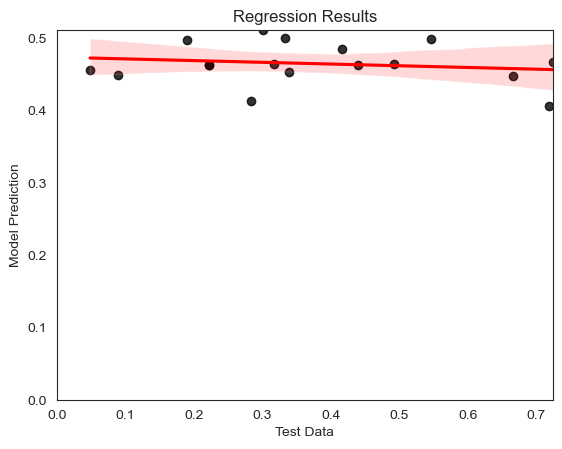

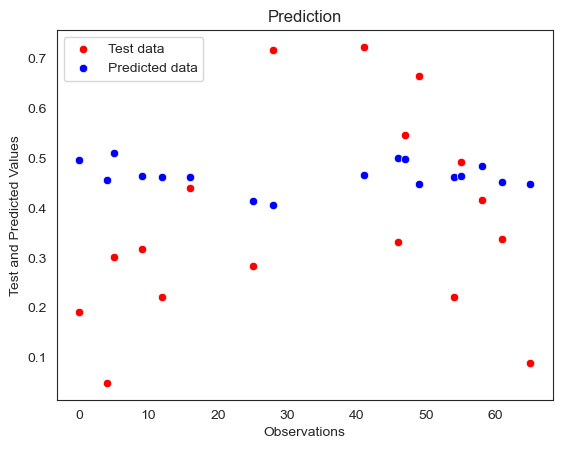

Mean Absolute Error: 0.19279317565029633
Mean Squared Error: 0.049868843240193285
Root Mean Squared Error: 0.22331332974140455
R Squared: -0.2812574230144278


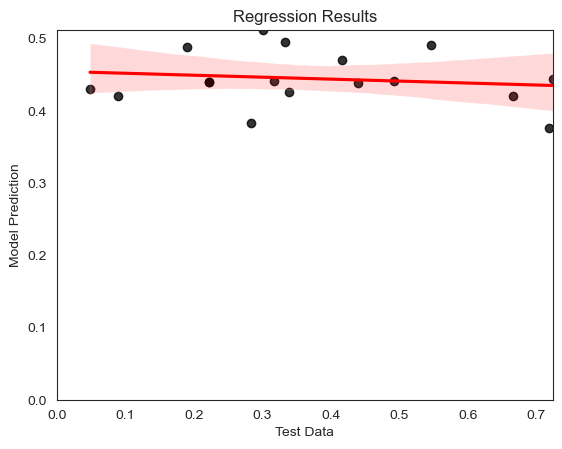

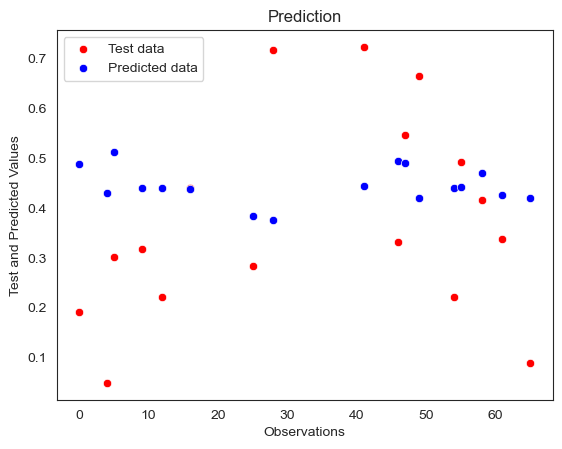

Mean Absolute Error: 0.18570386675435474
Mean Squared Error: 0.04738631534089997
Root Mean Squared Error: 0.21768398044160248
R Squared: -0.2174749670330478


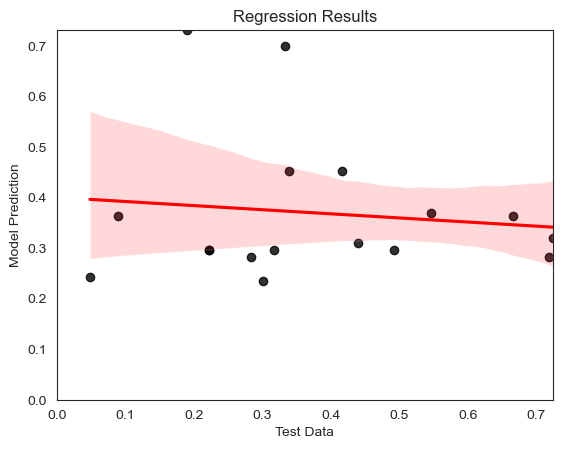

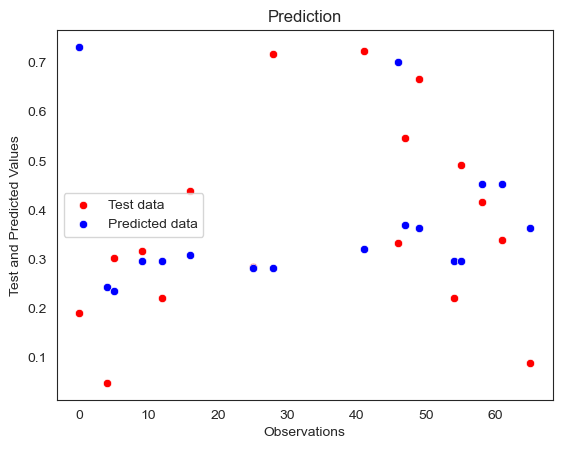

Mean Absolute Error: 0.20061800023923718
Mean Squared Error: 0.06477248480098279
Root Mean Squared Error: 0.2545043905338035
R Squared: -0.664169881756149


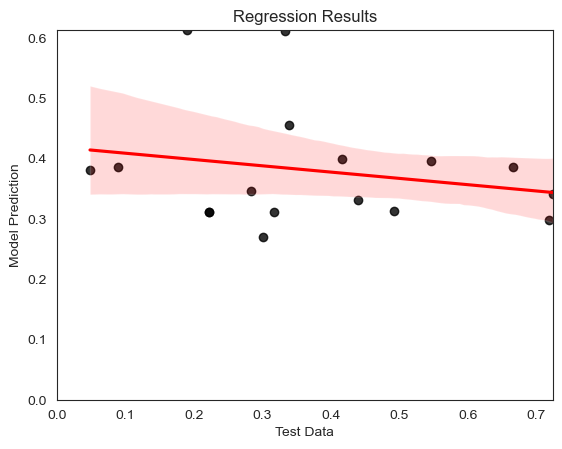

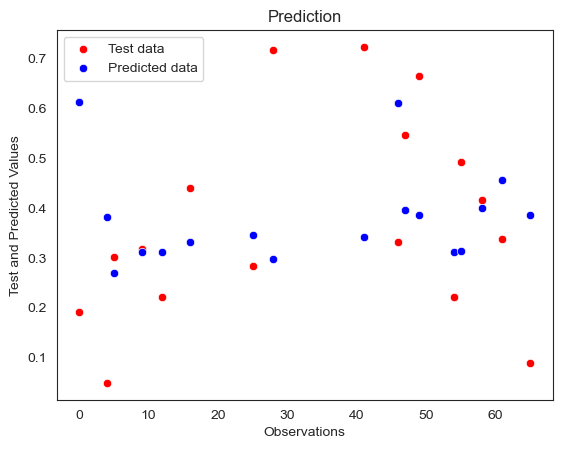

Mean Absolute Error: 0.19200607871950504
Mean Squared Error: 0.05630899045653675
Root Mean Squared Error: 0.2372951547262117
R Squared: -0.4467211853580313


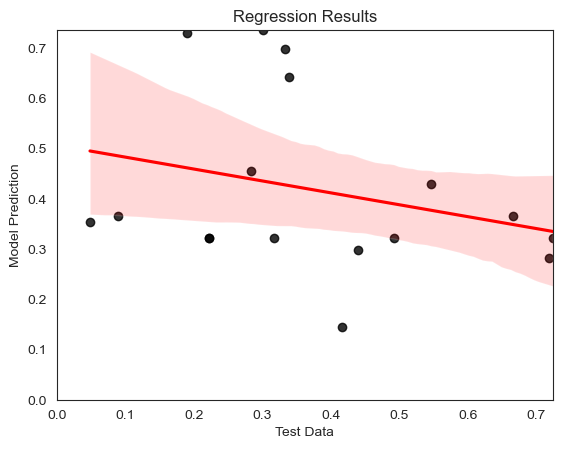

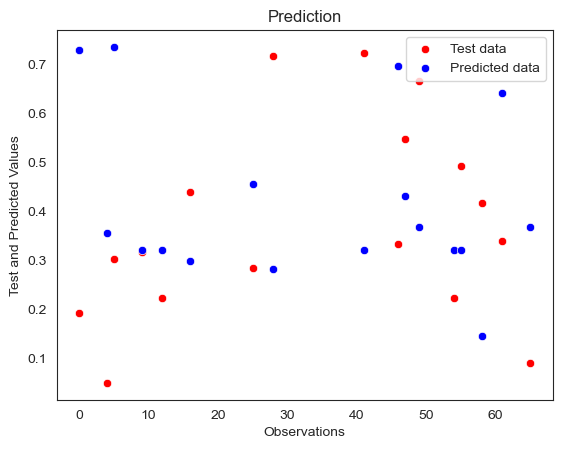

Mean Absolute Error: 0.26089302042931256
Mean Squared Error: 0.08826943641517054
Root Mean Squared Error: 0.29710172738503315
R Squared: -1.2678663326420274


,Model,R Squared
1,🥇 Support Vector Regression,-0.22
2,🥈 Linear Regression,-0.28
3,🥉 Random Forest Regression,-0.45
4,Decision Tree Regression,-0.66
5,XGBoost Regression,-1.27


In [140]:
from IPython.display import display, HTML

data_cont = mean_compound_before_930am
# Move response variable (Normalized Adj Close) to the end of the DataFrame
data_cont = data_cont[[col for col in data_cont.columns if col != 'Normalized_Open_Close_Diff'] + ['Normalized_Open_Close_Diff']]


# Splitting the dataset - Make sure that the response variable is in the last column
X = data_cont[['mean_compound_before_930am']]
y = data_cont['Normalized_Open_Close_Diff']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a dictionary to store R squared values for each regression model
r2_values = {}

display(HTML("<h1>mean_compound_before_930am (Normalized_Open_Close_Diff)</h1>"))
# 1. Linear Regression
display(HTML("<h1>Linear Regression</h1>"))
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
reg_plot(y_test, y_pred_lin)
scatter_plot_comparison(y_test, y_pred_lin)
reg_metrics(y_test, y_pred_lin)
r2_values['Linear Regression'] = metrics.r2_score(y_test, y_pred_lin)

# 2. Support Vector Regression (SVR)
display(HTML("<h1>Support Vector Regression (SVR)</h1>"))
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)
reg_plot(y_test, y_pred_svr)
scatter_plot_comparison(y_test, y_pred_svr)
reg_metrics(y_test, y_pred_svr)
r2_values['Support Vector Regression'] = metrics.r2_score(y_test, y_pred_svr)

# 3. Decision Tree - Regression
display(HTML("<h1>Decision Tree - Regression</h1>"))
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
reg_plot(y_test, y_pred_dt)
scatter_plot_comparison(y_test, y_pred_dt)
reg_metrics(y_test, y_pred_dt)
r2_values['Decision Tree Regression'] = metrics.r2_score(y_test, y_pred_dt)

# 4. Random Forest - Regression
display(HTML("<h1>Random Forest - Regression</h1>"))
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
reg_plot(y_test, y_pred_rf)
scatter_plot_comparison(y_test, y_pred_rf)
reg_metrics(y_test, y_pred_rf)
r2_values['Random Forest Regression'] = metrics.r2_score(y_test, y_pred_rf)

# 5. XGBoost - Regression
display(HTML("<h1>XGBoost - Regression</h1>"))
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
reg_plot(y_test, y_pred_xgb)
scatter_plot_comparison(y_test, y_pred_xgb)
reg_metrics(y_test, y_pred_xgb)
r2_values['XGBoost Regression'] = metrics.r2_score(y_test, y_pred_xgb)

# Create a DataFrame to display R squared values and sort them by the highest value
r2_df = pd.DataFrame(list(r2_values.items()), columns=['Regression Type', 'R Squared'])
r2_df_sorted = r2_df.sort_values(by='R Squared', ascending=False)



# Create a list of model names and R Squared values, adding ranking symbols
sorted_r2 = r2_df_sorted.reset_index(drop=True)
sorted_r2['Ranking'] = ['🥇', '🥈', '🥉'] + [''] * (len(sorted_r2) - 3)

# Create a formatted DataFrame
formatted_df = pd.DataFrame({
    'Model': sorted_r2['Ranking'] + ' ' + sorted_r2['Regression Type'],
    'R Squared': sorted_r2['R Squared'].round(4)
})

# Set the index to start from 1 for rankings
formatted_df.index += 1




# Display the DataFrame
formatted_df


